## Mobile Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
%matplotlib inline
sns.set(style = "darkgrid", font_scale = 1.5)
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [3]:
Mobile_df = pd.read_csv("Cellphone.csv")
Mobile_df.head(5)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [4]:
Mobile_df.tail(5)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [5]:
Mobile_df.sample(5)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
25,776,1390,24,146.0,5.0,220,4,1.200,8.0,1.000,5.0,5.0,1905,8.8
109,637,2858,285,174.0,5.7,513,4,1.875,32.0,4.000,16.0,5.0,3200,7.6
21,860,2392,22,147.0,5.2,282,8,1.400,32.0,3.000,13.0,16.0,2900,7.7
101,827,833,201,78.4,2.4,166,0,0.000,0.0,0.008,0.0,0.0,1100,12.9
34,1339,1421,31,120.0,4.0,233,2,1.000,4.0,0.512,2.0,0.0,1200,9.8


In [6]:
# Since Product_id is not so important so I will drop that column
Mobile_df.drop(["Product_id"], axis = 1, inplace = True)

In [7]:
# Renaming the columns(Capitalising the first word to maintain the consistency)
Mobile_df.rename(columns = {'weight' : 'Weight', 'resoloution': 'Resolution', 'ppi': 'PPI', 'cpu core': 'CPU Core', 'cpu freq':
                           'CPU Freq', 'internal mem': 'Internal Mem', 'ram': 'RAM', 'RearCam': 'Rear Cam', 'Front_Cam': 
                           'Front Cam', 'battery': 'Battery', 'thickness': 'Thickness'}, inplace = True)

In [8]:
Mobile_df.head(5)

,Price,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [9]:
Mobile_df.shape

(161, 13)

### So we have 161 rows and 13 columns

In [10]:
Mobile_df.columns

Index(['Price', 'Sale', 'Weight', 'Resolution', 'PPI', 'CPU Core', 'CPU Freq',
       'Internal Mem', 'RAM', 'Rear Cam', 'Front Cam', 'Battery', 'Thickness'],
      dtype='object')

In [11]:
Mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   Sale          161 non-null    int64  
 2   Weight        161 non-null    float64
 3   Resolution    161 non-null    float64
 4   PPI           161 non-null    int64  
 5   CPU Core      161 non-null    int64  
 6   CPU Freq      161 non-null    float64
 7   Internal Mem  161 non-null    float64
 8   RAM           161 non-null    float64
 9   Rear Cam      161 non-null    float64
 10  Front Cam     161 non-null    float64
 11  Battery       161 non-null    int64  
 12  Thickness     161 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 16.5 KB


In [12]:
Mobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,161.0,2215.596273,768.187171,614.0,1734.0,2258.00,2744.000,4361.0
Sale,161.0,621.465839,1546.618517,10.0,37.0,106.00,382.000,9807.0
Weight,161.0,170.426087,92.888612,66.0,134.1,153.00,170.000,753.0
Resolution,161.0,5.209938,1.509953,1.4,4.8,5.15,5.500,12.2
PPI,161.0,335.055901,134.826659,121.0,233.0,294.00,428.000,806.0
CPU Core,161.0,4.857143,2.444016,0.0,4.0,4.00,8.000,8.0
CPU Freq,161.0,1.502832,0.599783,0.0,1.2,1.40,1.875,2.7
Internal Mem,161.0,24.501714,28.804773,0.0,8.0,16.00,32.000,128.0
RAM,161.0,2.204994,1.609831,0.0,1.0,2.00,3.000,6.0
Rear Cam,161.0,10.378261,6.181585,0.0,5.0,12.00,16.000,23.0


## Checking NaN values in our Dataset

In [13]:
Mobile_df.isnull().sum().to_frame().rename(columns =  {0 : 'Total number of missing values'})

,Total number of missing values
Price,0
Sale,0
Weight,0
Resolution,0
PPI,0
CPU Core,0
CPU Freq,0
Internal Mem,0
RAM,0
Rear Cam,0


## Checking for Duplicate Values

In [14]:
print("Duplicate Values =",Mobile_df.duplicated().sum())

Duplicate Values = 0


## Checking for the correlation

In [15]:
Correlation_Matrix =  Mobile_df.corr()
Correlation_Matrix

,Price,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
Price,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
Weight,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
Resolution,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
PPI,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
CPU Core,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
CPU Freq,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
Internal Mem,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
RAM,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074
Rear Cam,0.739538,0.292164,-0.029448,0.249892,0.774008,0.611353,0.625104,0.451917,0.648073,1.000000,0.596374,0.287821,-0.550998


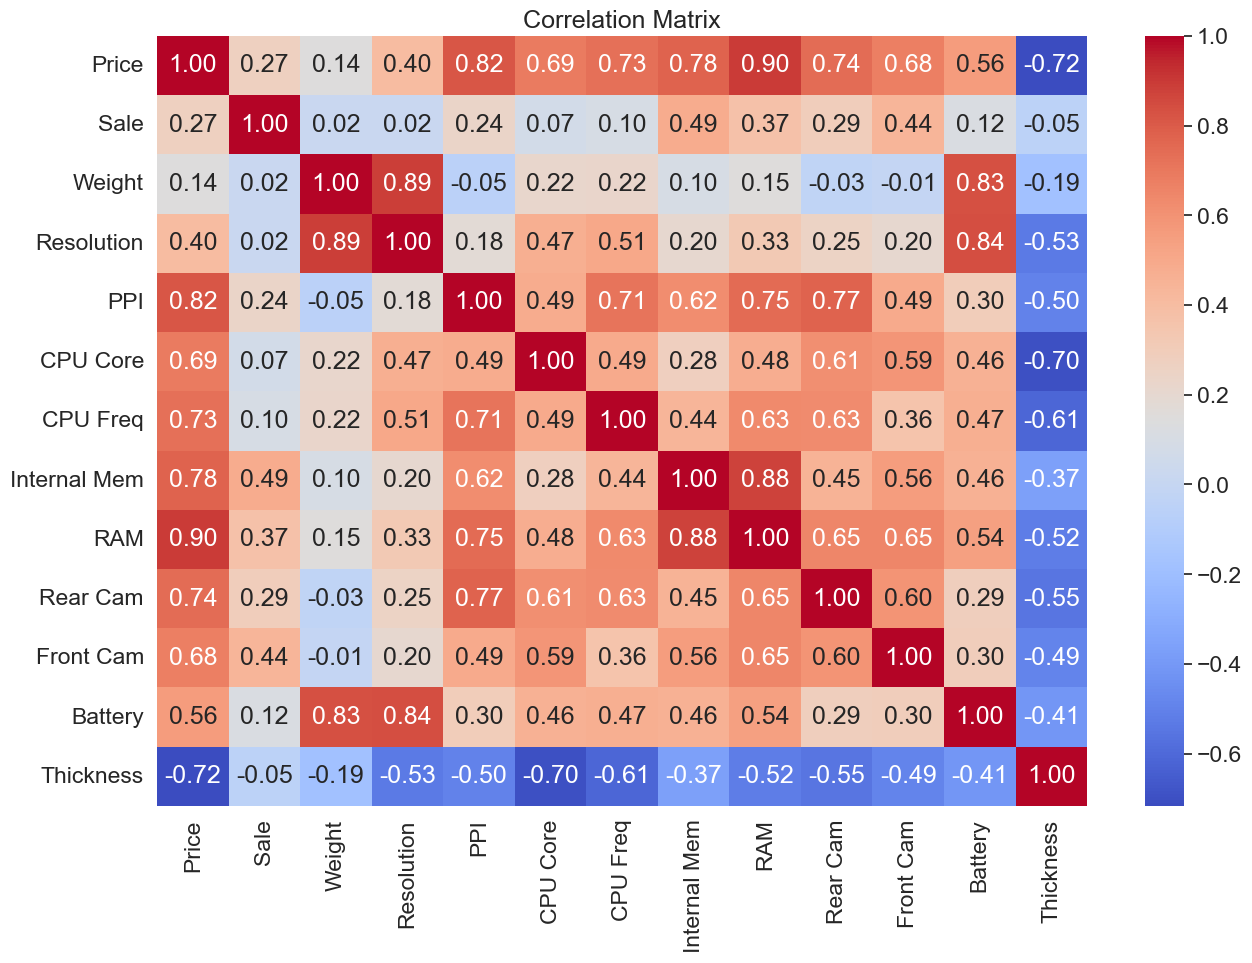

In [16]:
plt.figure(figsize = (15, 10))
sns.heatmap(Correlation_Matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

### From the above correlation matrix we can infer that 
### Price and [RAM, PPI, CPU Core, CPU Freq, Internal Mem, Rear Cam, Front Cam] are highly corelated to each other
### Weight and [Resolution, Battery] are highly corelated to each other
### Resolution and [Battery, Weight] are highly corelated to each other
### PPI and [CPU Freq, RAM, Rear Cam] are highly corelated to each other
### Internal Memory and [RAM]

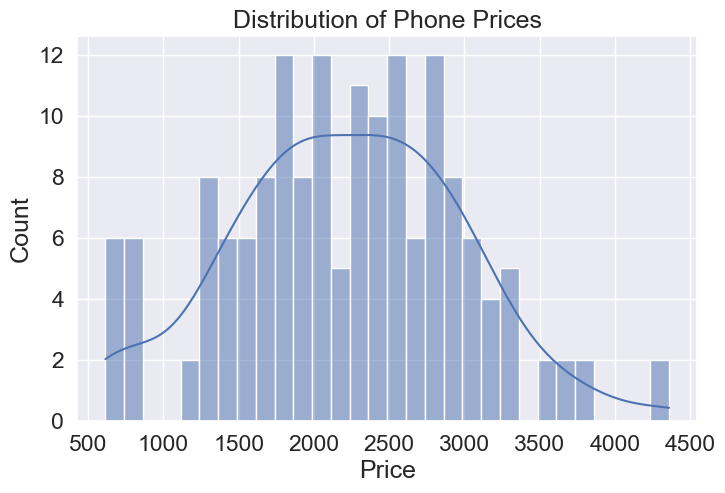

In [17]:
plt.figure(figsize = (8,5))
sns.histplot(Mobile_df['Price'], kde = True, bins = 30)
plt.title('Distribution of Phone Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

## From the above distribution we can infer that Price has a normal distribution 

## Price VS RAM

In [18]:
Price_Vs_RAM = Mobile_df.groupby('RAM', as_index = False)['Price'].sum().sort_values(by = 'Price', ascending = False)
Price_Vs_RAM

,RAM,Price
8,2.000,78804
9,3.000,71499
6,1.000,63260
10,4.000,61468
11,6.000,43346
5,0.512,18210
7,1.500,8760
1,0.004,4318
0,0.000,2714
2,0.008,1666


In [19]:
ram_order = Price_Vs_RAM['RAM']

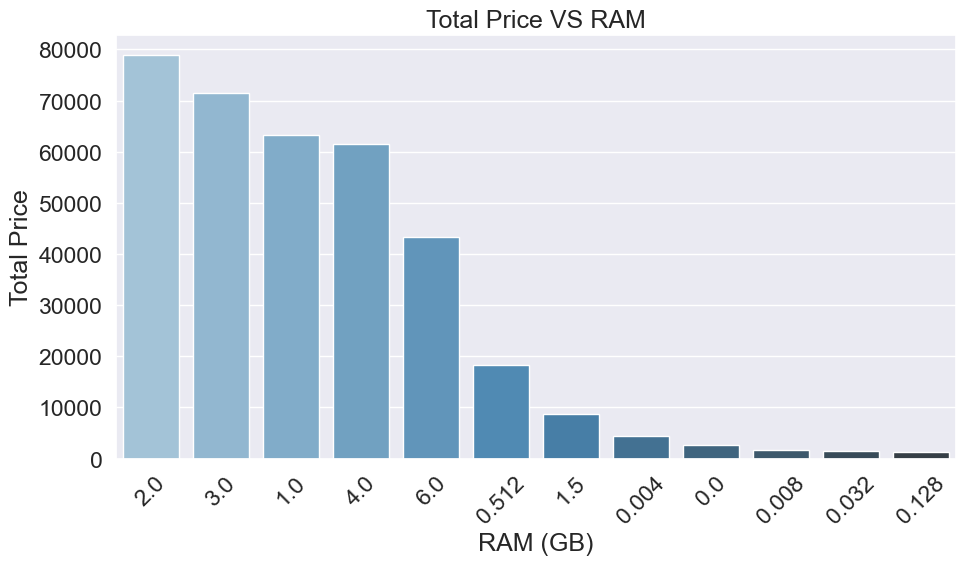

In [20]:
plt.figure(figsize = (10,6))
sns.barplot(data = Price_Vs_RAM, x = 'RAM', y = 'Price', palette = 'Blues_d', order = ram_order)
plt.title('Total Price VS RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Total Price')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## So, from here we can infer that:
### 2 GB phones are sold the most 
### 3 GB phones are at the second place and 
### 1 GB phones are at the third place

## Battery and Weight

In [21]:
# Top 5 most frequent battery values
top_batteries = Mobile_df['Battery'].value_counts().nlargest(5).index

In [22]:
# Filter the dataset to include only these top batteries
filtered_df = Mobile_df[Mobile_df['Battery'].isin(top_batteries)]

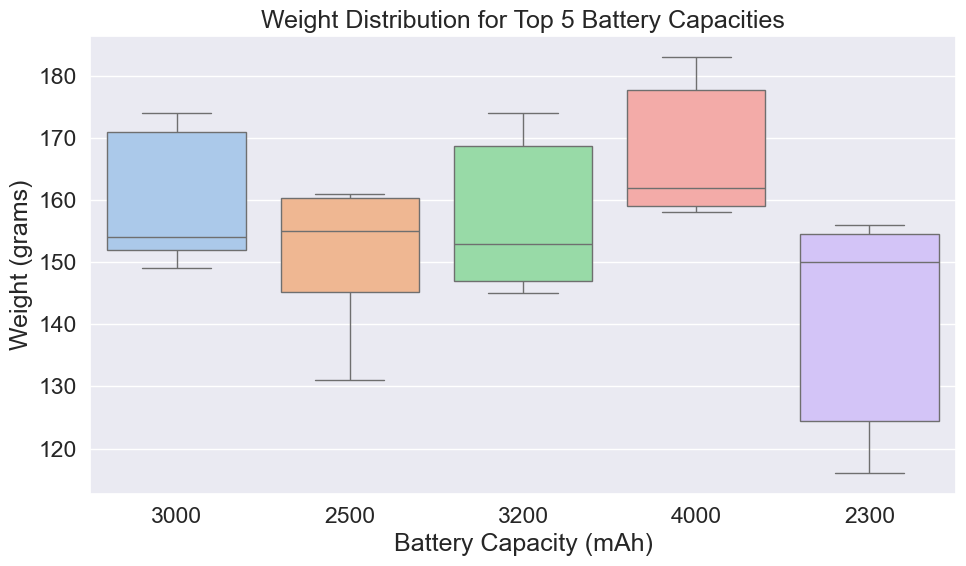

In [23]:
# Boxplot to visualize the weight distribution of top batteries
plt.figure(figsize = (10,6))
sns.boxplot(data = filtered_df, x = 'Battery', y = 'Weight', order = top_batteries, palette = 'pastel')

plt.title('Weight Distribution for Top 5 Battery Capacities')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (grams)')
plt.tight_layout()
plt.show()

## The batteries with the lowest Weight has less battery capacity compared to others.

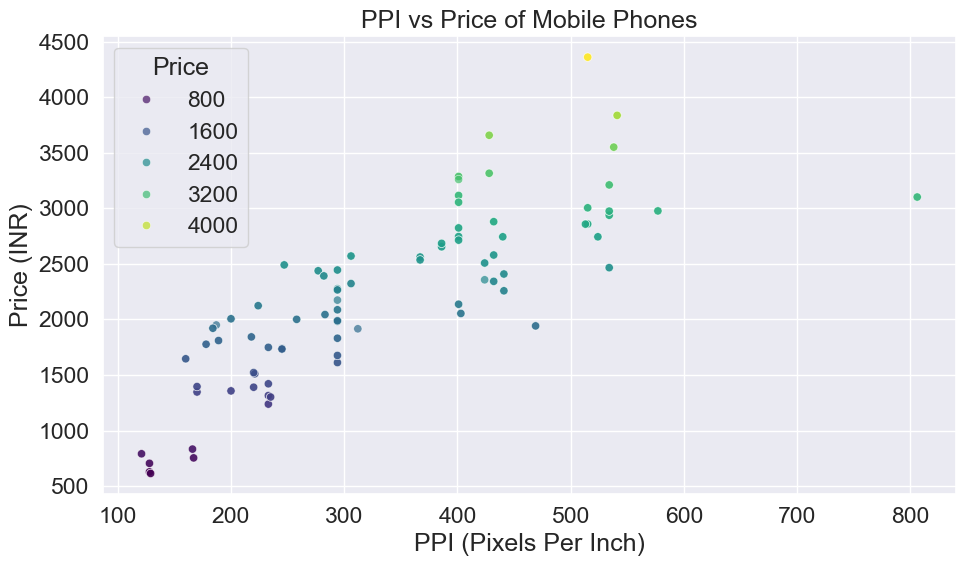

In [24]:
## Price VS PPI(Pixel Per Inch)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=Mobile_df, x='PPI', y='Price', hue='Price', palette='viridis', alpha=0.7)
plt.title('PPI vs Price of Mobile Phones')
plt.xlabel('PPI (Pixels Per Inch)')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pixel and price has almost the linear relationship. 

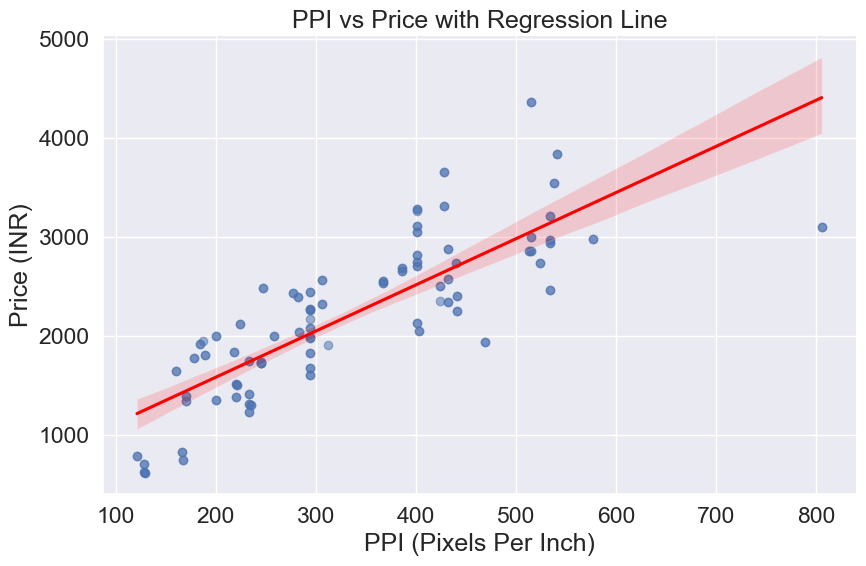

In [25]:
## Regression Plot (Trend Line to Show Relationship)

sns.lmplot(data=Mobile_df, x='PPI', y='Price', height=6, aspect=1.5, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('PPI vs Price with Regression Line')
plt.xlabel('PPI (Pixels Per Inch)')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()

# Checking and treating the outlier

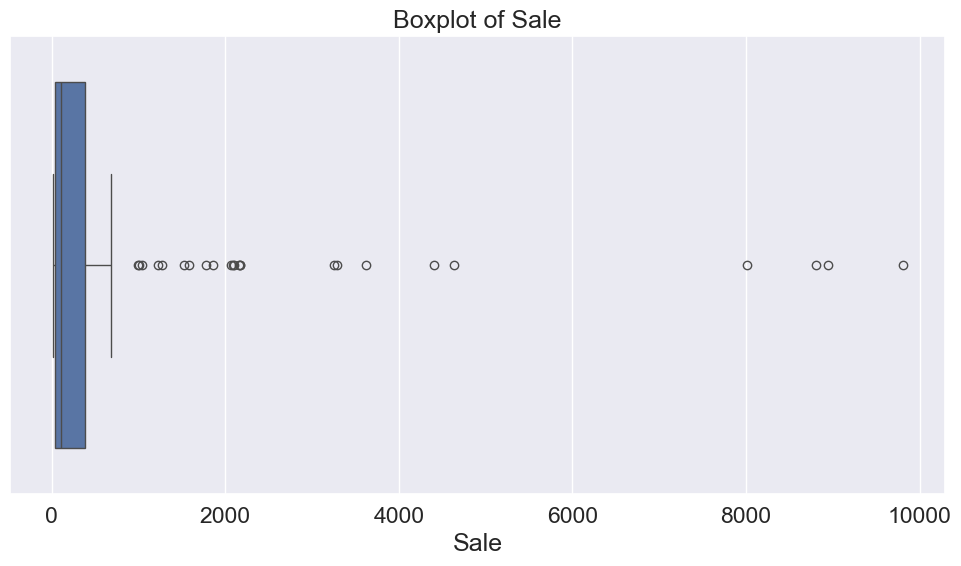

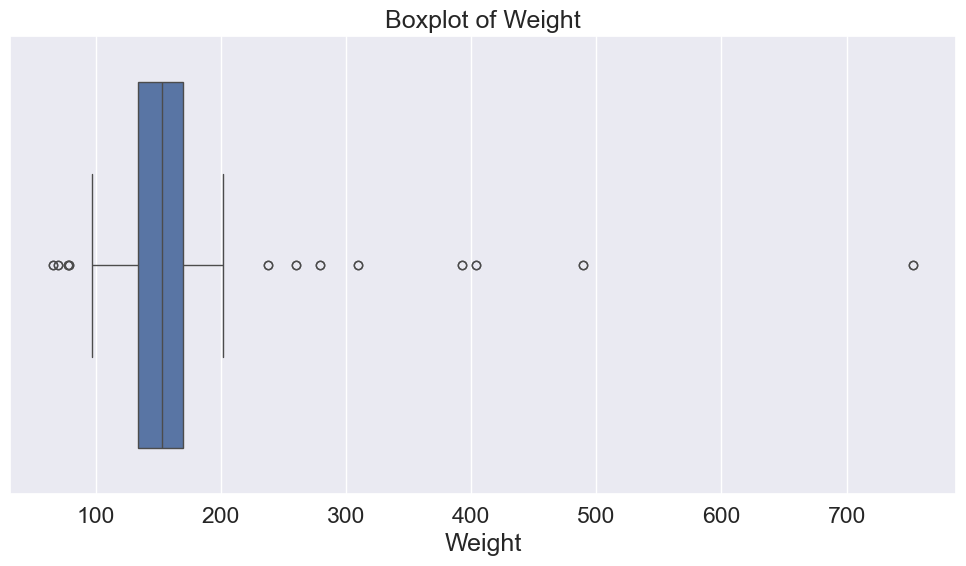

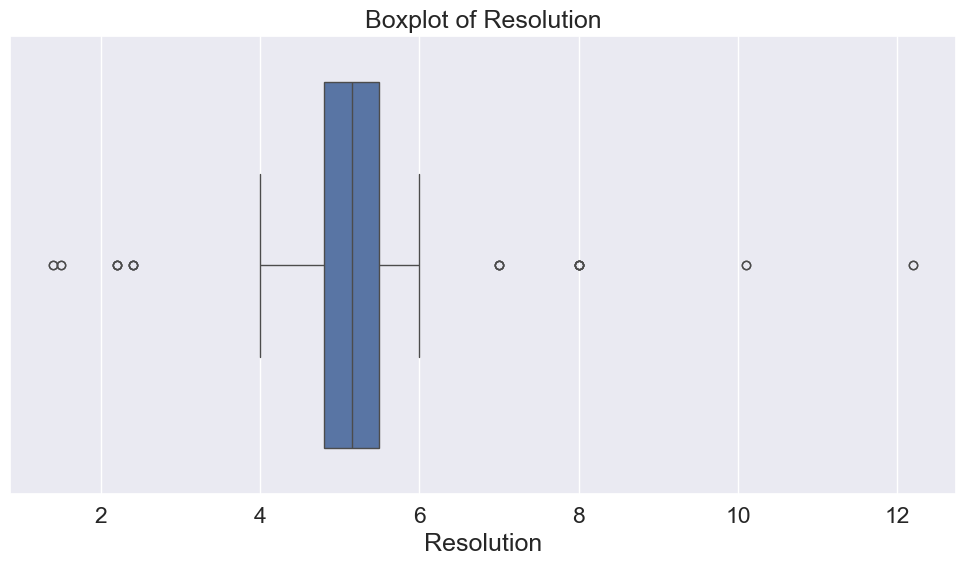

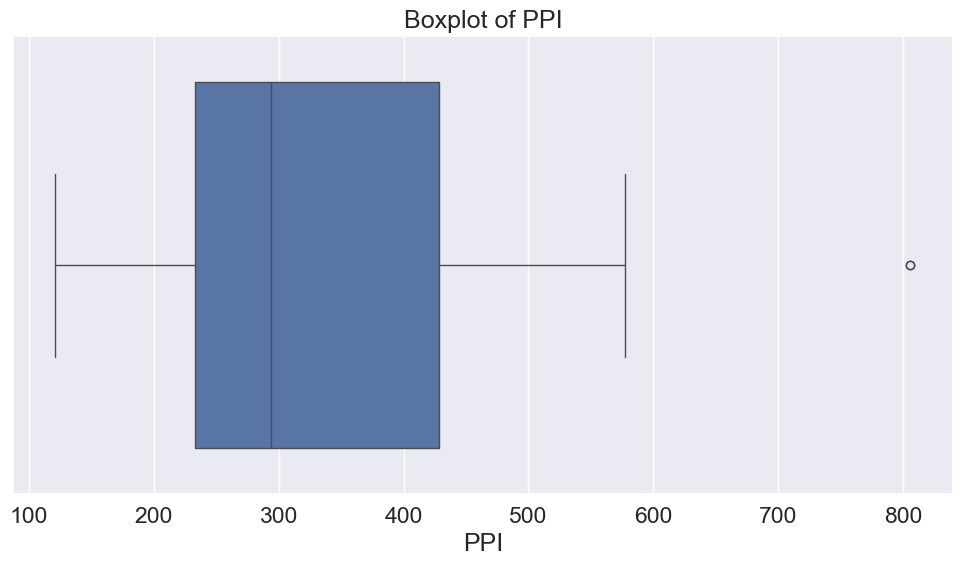

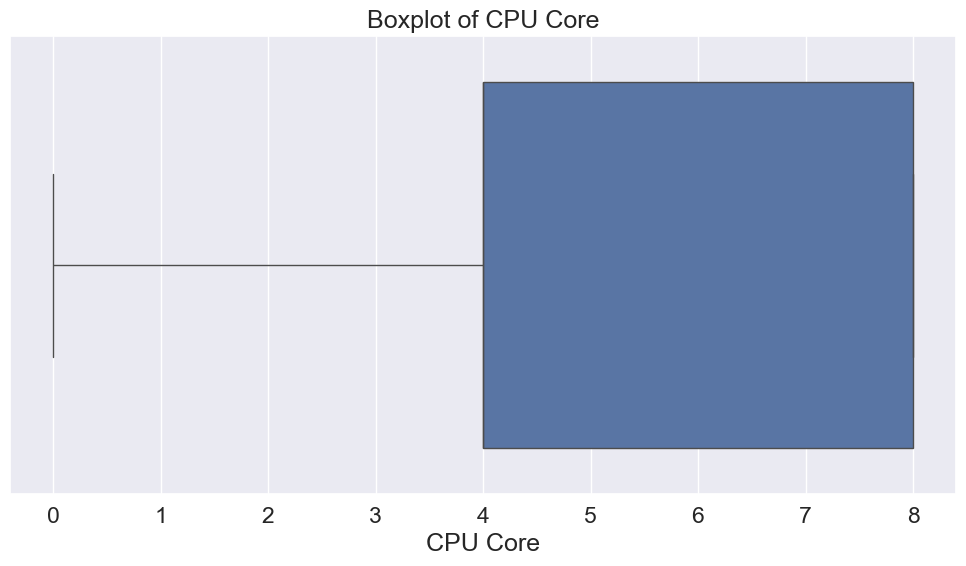

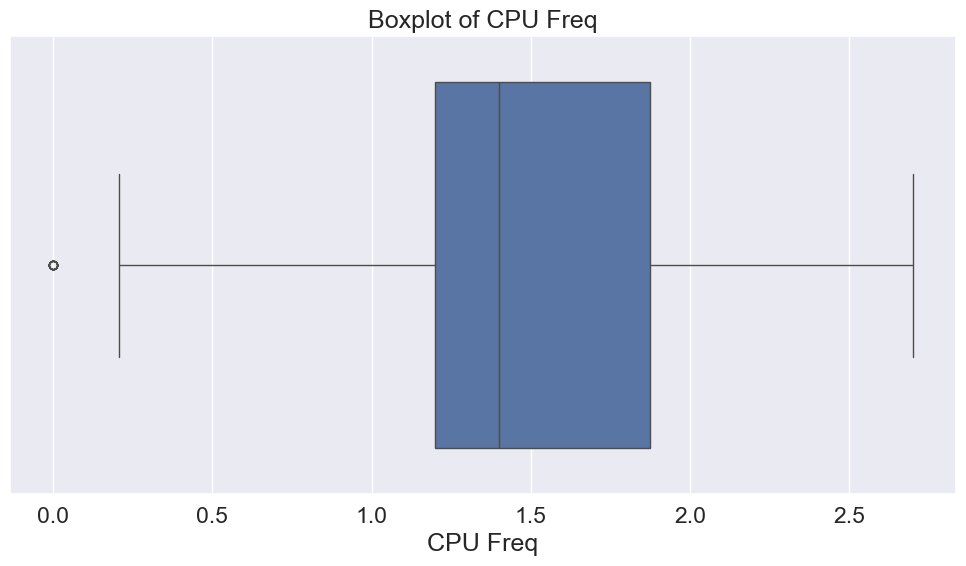

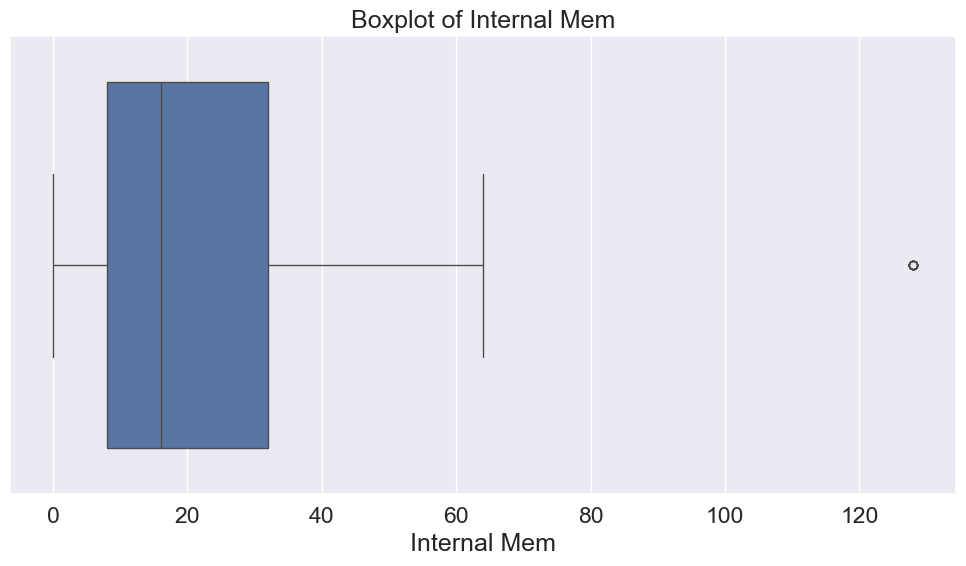

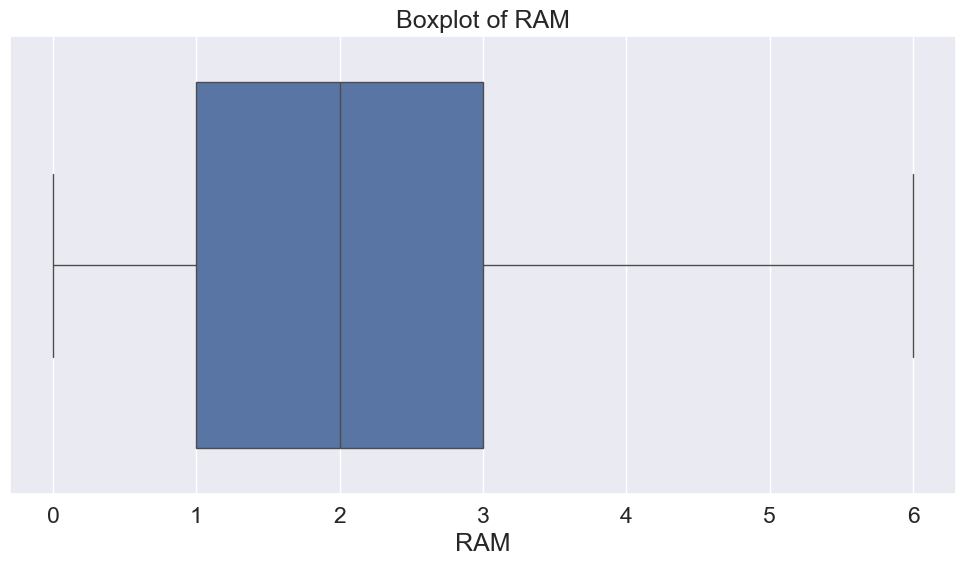

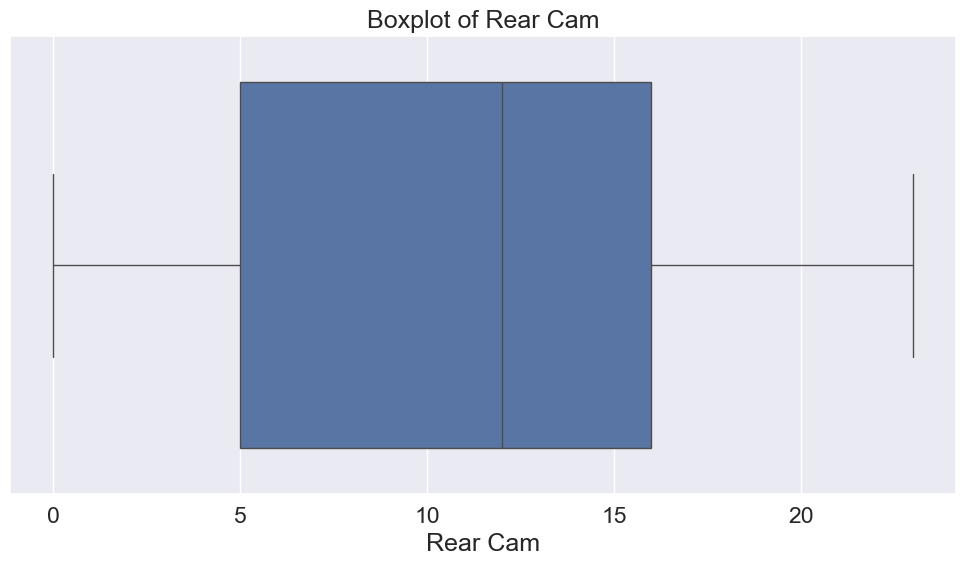

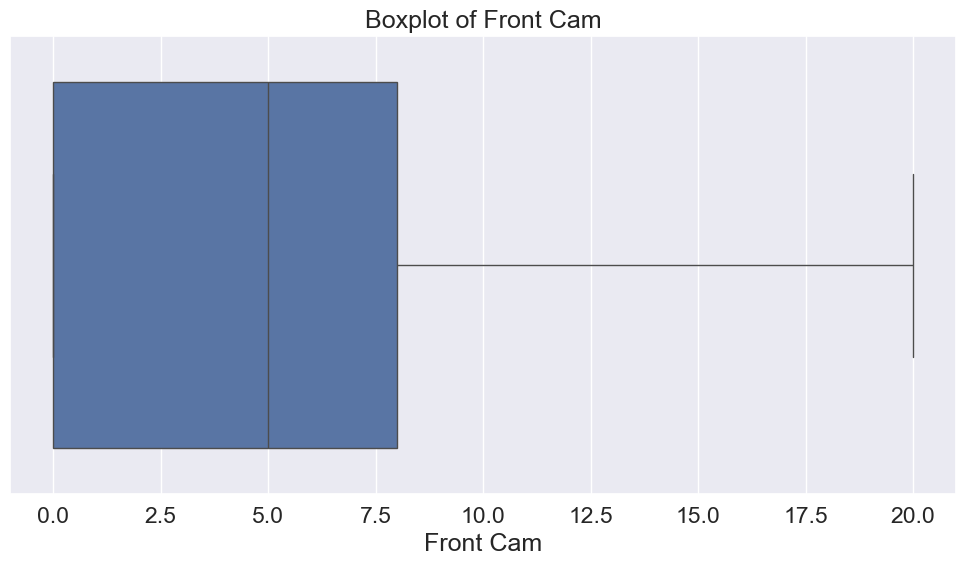

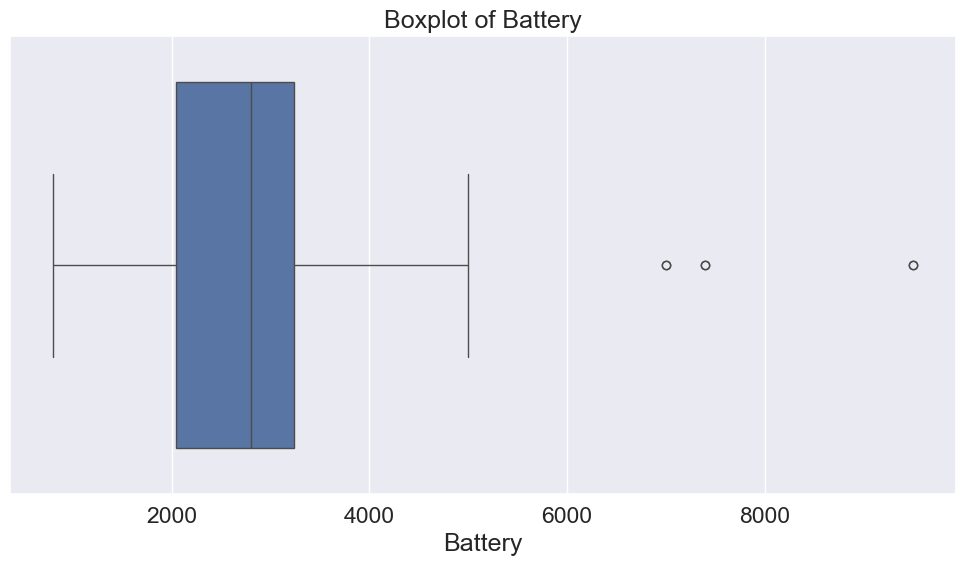

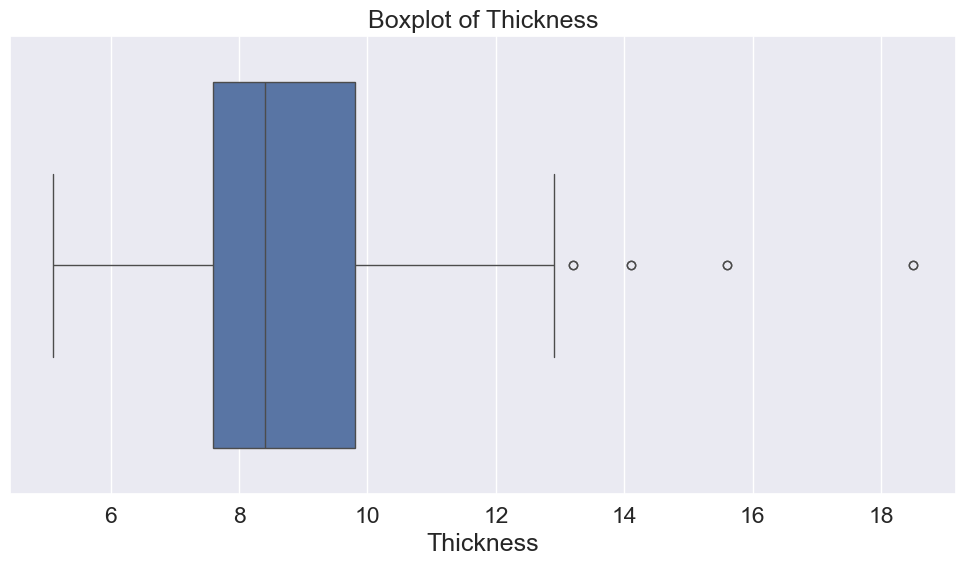

In [26]:
numerical_cols = Mobile_df.select_dtypes(include=['number']).drop(columns = ['Price']).columns
for col in numerical_cols:
    plt.figure(figsize = (10,6))
    sns.boxplot(x= Mobile_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Checking which columns has how many outliers

In [27]:
def detect_outlier_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers
    
# Apply the function to each numeric column
for col in numerical_cols:
    outliers = detect_outlier_iqr(Mobile_df[col]) 
    print(f"Column: {col} | Outlier Detected : {len(outliers)}")

Column: Sale | Outlier Detected : 24
Column: Weight | Outlier Detected : 24
Column: Resolution | Outlier Detected : 26
Column: PPI | Outlier Detected : 2
Column: CPU Core | Outlier Detected : 0
Column: CPU Freq | Outlier Detected : 10
Column: Internal Mem | Outlier Detected : 8
Column: RAM | Outlier Detected : 0
Column: Rear Cam | Outlier Detected : 0
Column: Front Cam | Outlier Detected : 0
Column: Battery | Outlier Detected : 6
Column: Thickness | Outlier Detected : 8


### Clearly we can see that:
### For sale there are : 24 outliers
### For weight there are : 24 outliers
### For resolution there are : 26 outliers
### For PPI there are : 2 outliers
### For CPU Freq there are : 10 outliers
### For Internal Mem there are : 8 outliers
### For Battery there are : 6 outliers
### For Thickness there are : 8 outliers

# We will check how many rows have outliers out of the total rows

In [28]:
outlier_rows = set()

for col in numerical_cols:
    outliers = detect_outlier_iqr(Mobile_df[col])
    outlier_rows.update(outliers.index)  # Add the index of outlier rows to the set

print(f"Rows with at least one outlier: {len(outlier_rows)} / {len(Mobile_df)}")
print(f"Total Percentage of outlier as a whole: ({len(outlier_rows)} / {len(Mobile_df)}) * 100 = {(len(outlier_rows) / len(Mobile_df)) * 100:.2f}%")

Rows with at least one outlier: 48 / 161
Total Percentage of outlier as a whole: (48 / 161) * 100 = 29.81%


# We can clearly see that 29.81% out of the total rows has an outliers so we will treat the outliers using capping method

In [29]:
Mobile_df_capped = Mobile_df.copy()

for col in numerical_cols:
    Q1 = Mobile_df[col].quantile(0.25)
    Q3 = Mobile_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    Mobile_df_capped[col] = Mobile_df[col].clip(lower, upper)  # Cap values


# Checking outliers after treating

In [30]:
# Check for outliers after capping
print("\n Outliers after capping:")

for col in numerical_cols:
    outliers = detect_outlier_iqr(Mobile_df_capped[col]) 
    print(f"Column: {col} | Outlier Detected: {len(outliers)}")



 Outliers after capping:
Column: Sale | Outlier Detected: 0
Column: Weight | Outlier Detected: 0
Column: Resolution | Outlier Detected: 0
Column: PPI | Outlier Detected: 0
Column: CPU Core | Outlier Detected: 0
Column: CPU Freq | Outlier Detected: 0
Column: Internal Mem | Outlier Detected: 0
Column: RAM | Outlier Detected: 0
Column: Rear Cam | Outlier Detected: 0
Column: Front Cam | Outlier Detected: 0
Column: Battery | Outlier Detected: 0
Column: Thickness | Outlier Detected: 0


# Visualization after treating the outliers

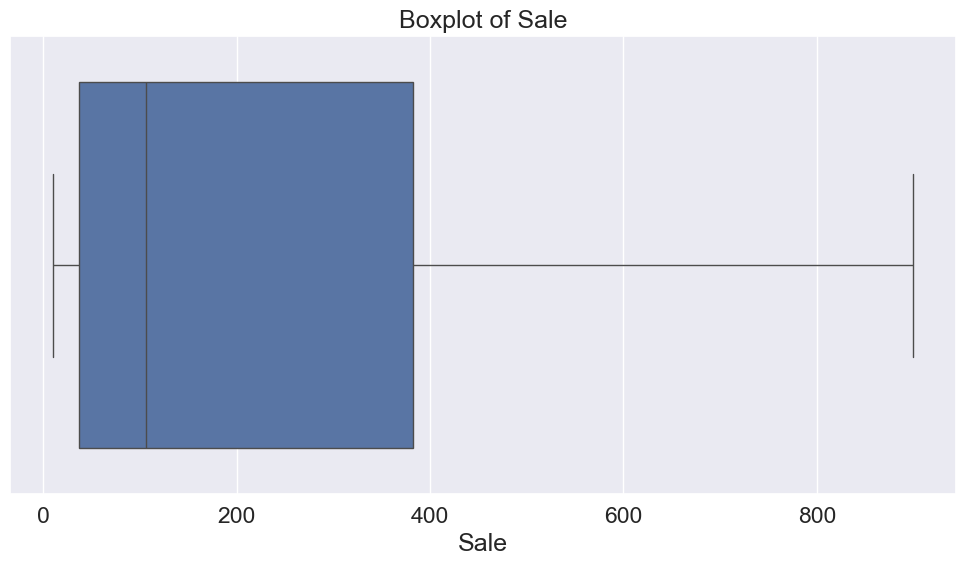

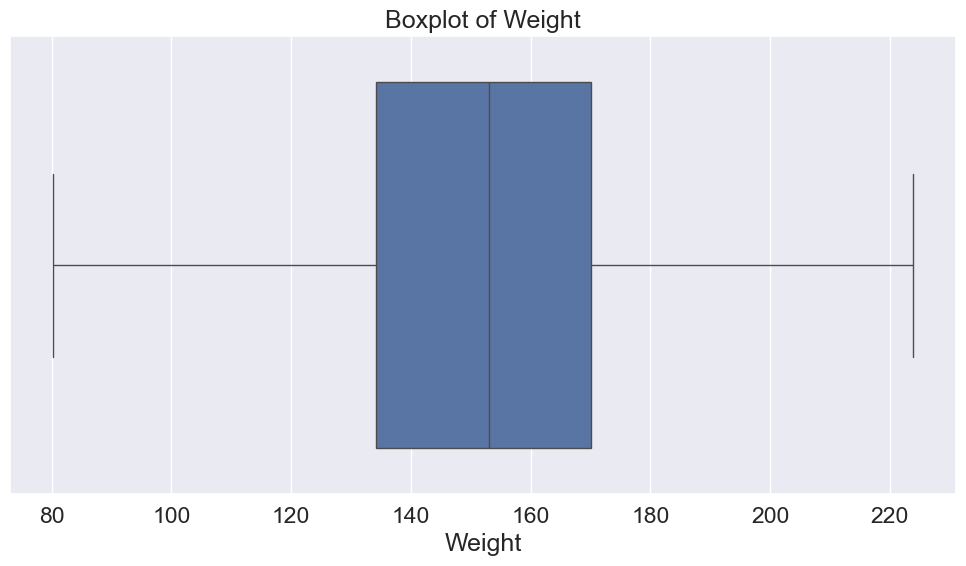

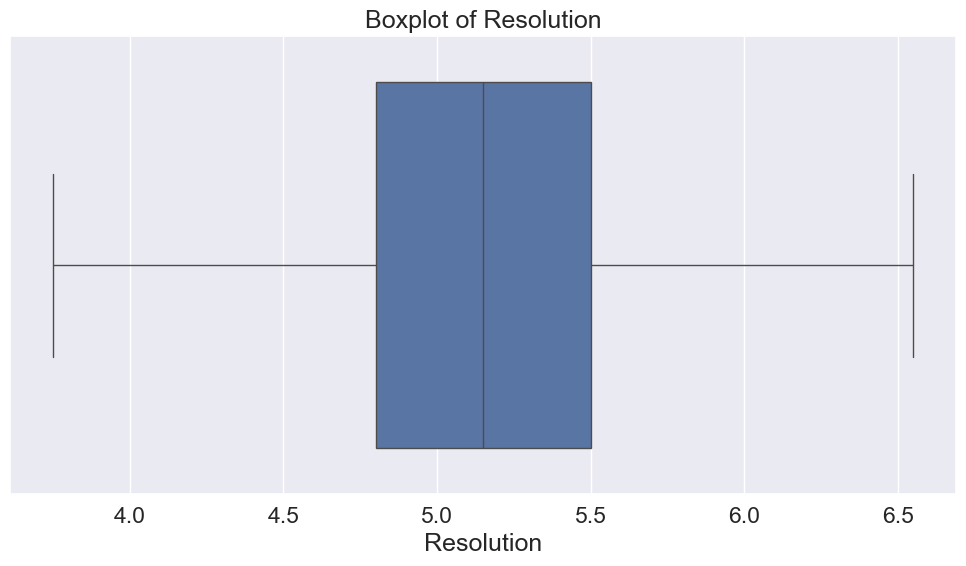

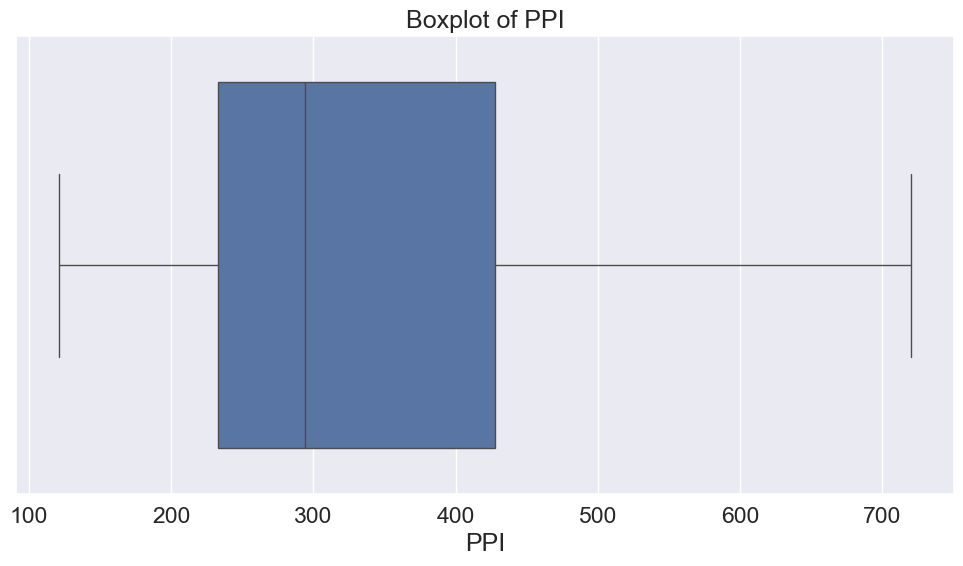

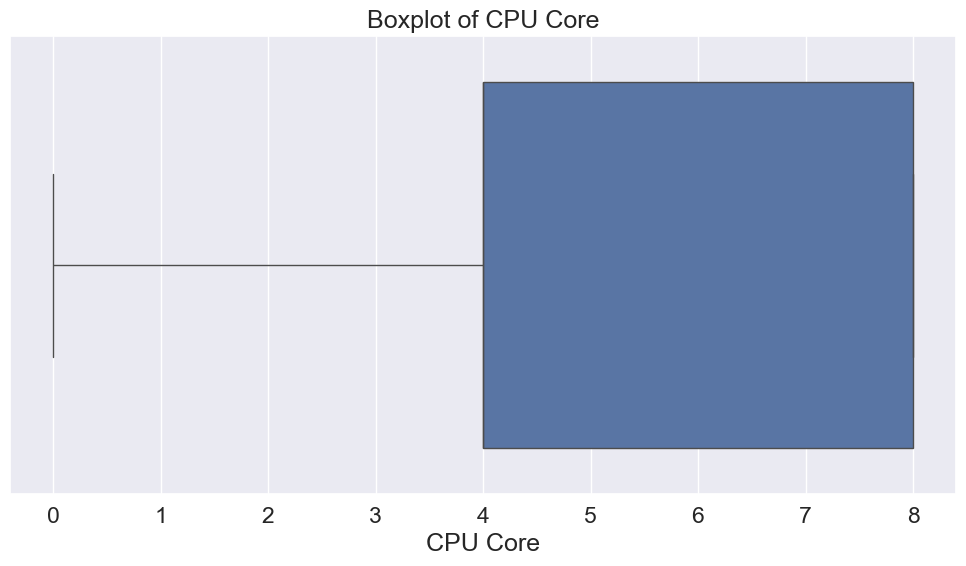

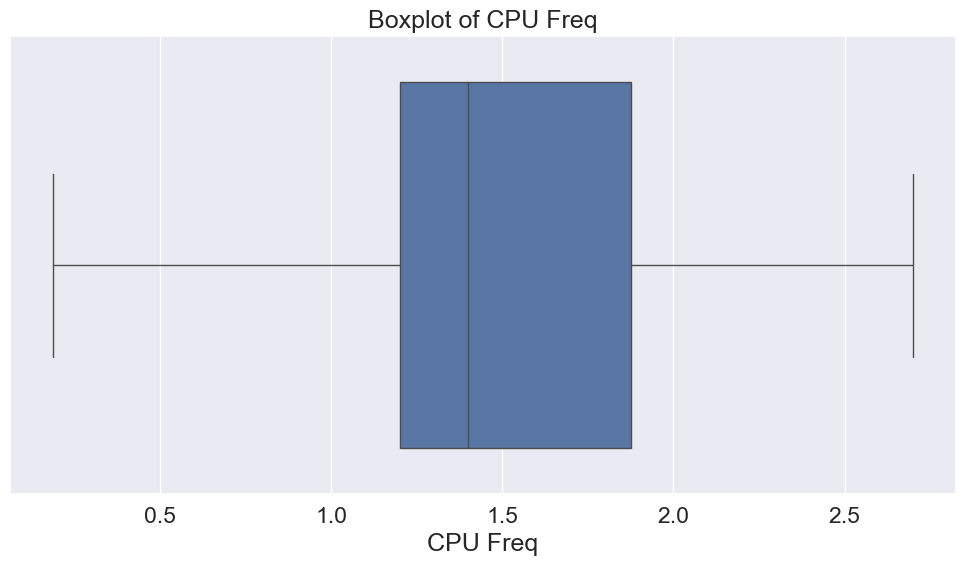

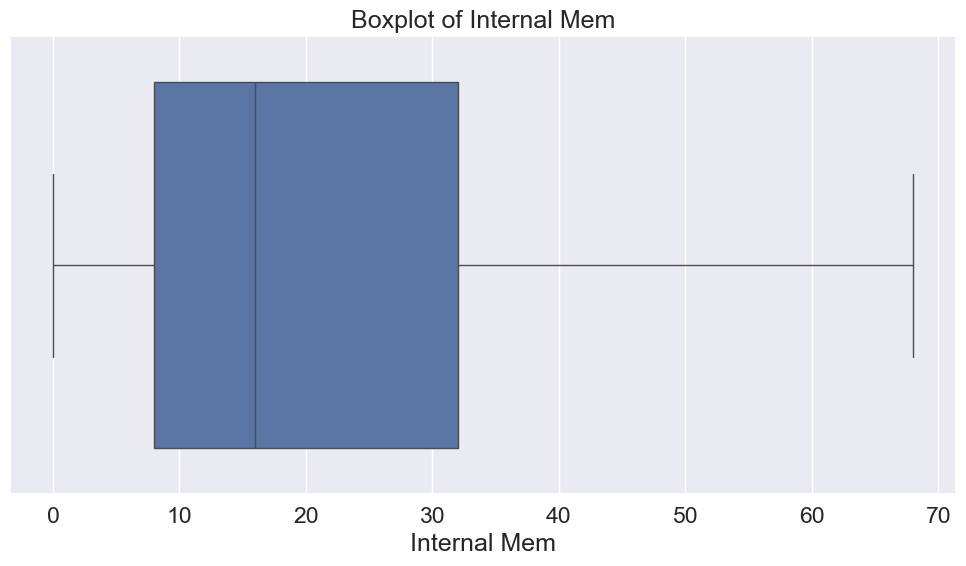

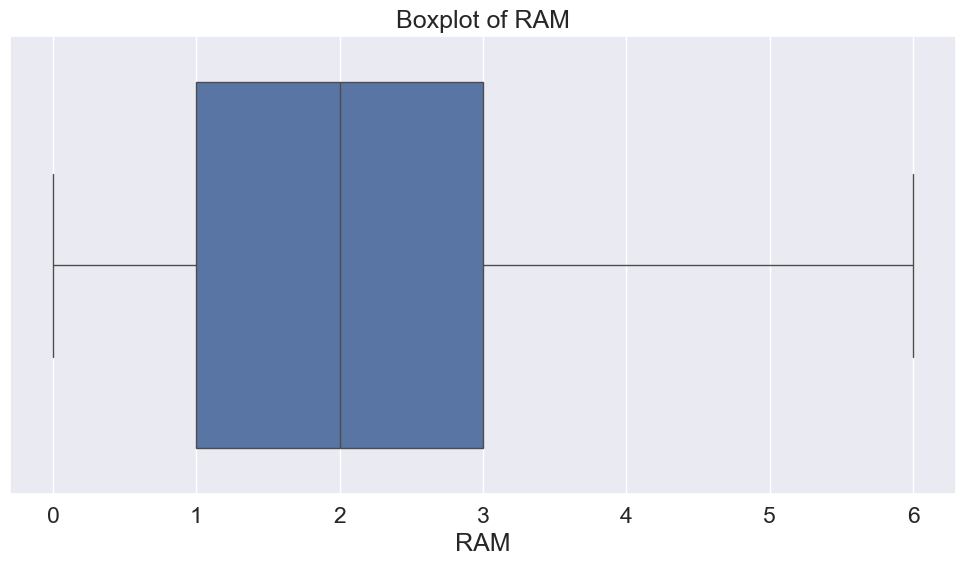

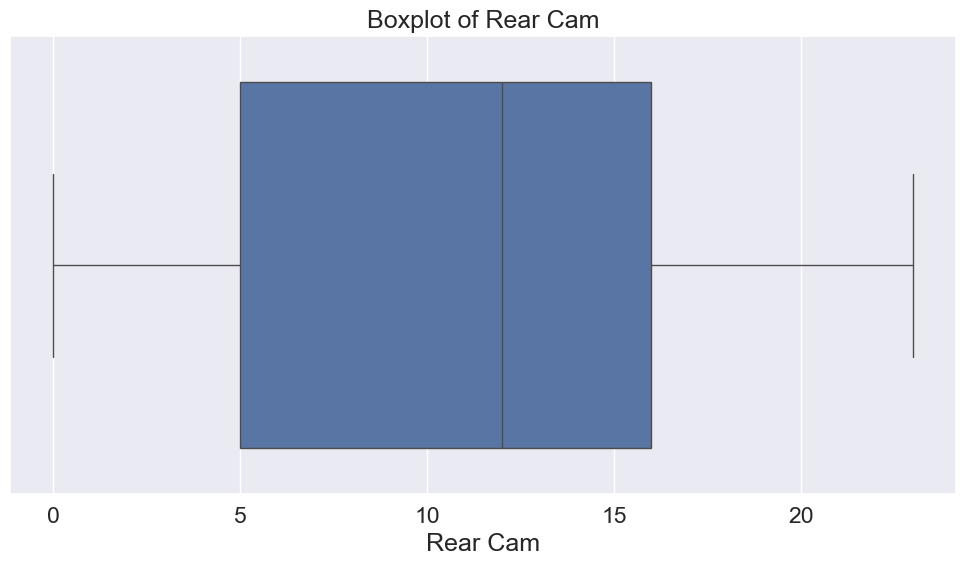

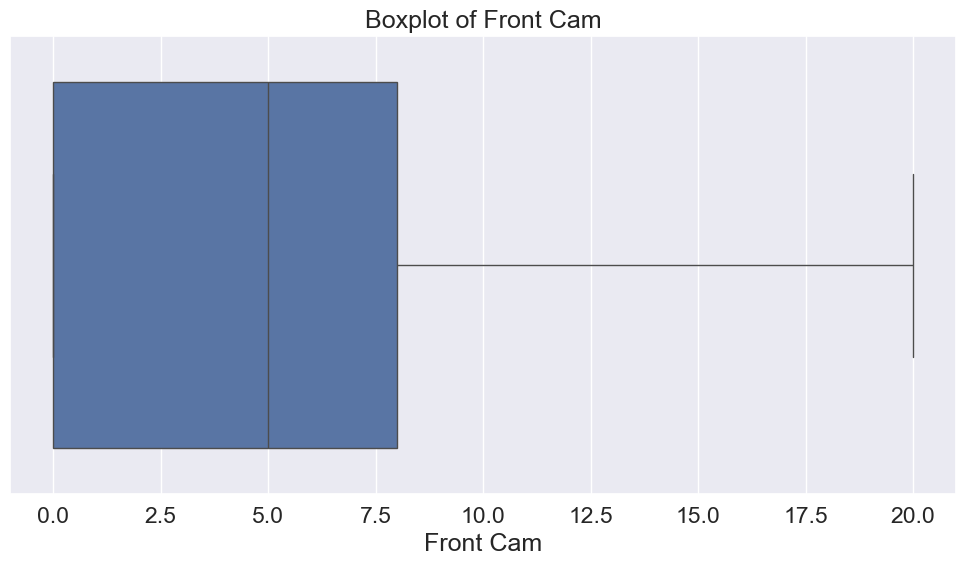

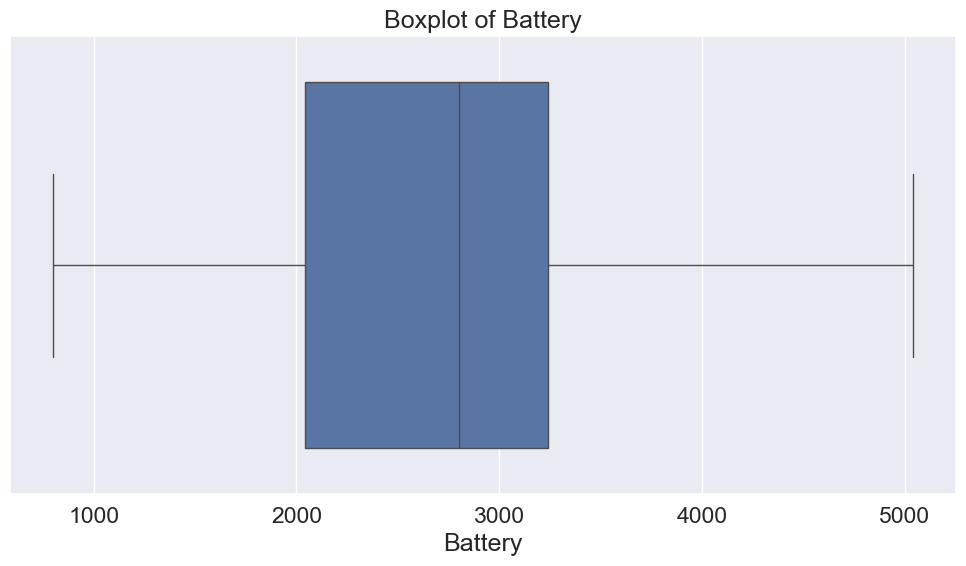

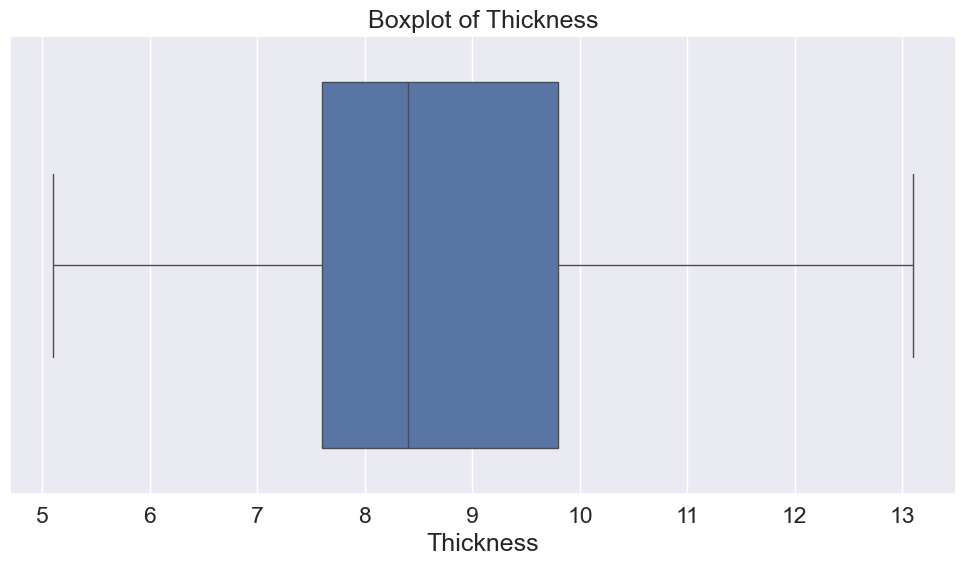

In [31]:
numerical_cols = Mobile_df_capped.select_dtypes(include=['number']).drop(columns = ['Price']).columns
for col in numerical_cols:
    plt.figure(figsize = (10,6))
    sns.boxplot(x= Mobile_df_capped[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# So clearly after the outlier treatment there is no outlier

# Now we will check for the skewness

## First we will check the Distribution of the Variables

In [32]:
Numerical_col = Mobile_df_capped.select_dtypes(include=['int64', 'float64']).drop(columns = ['Price']).columns

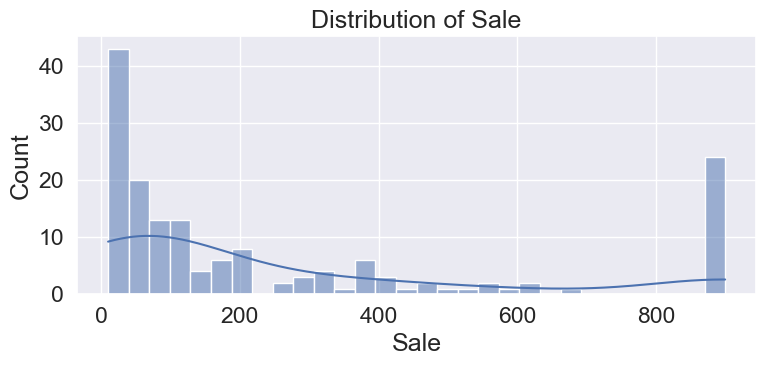

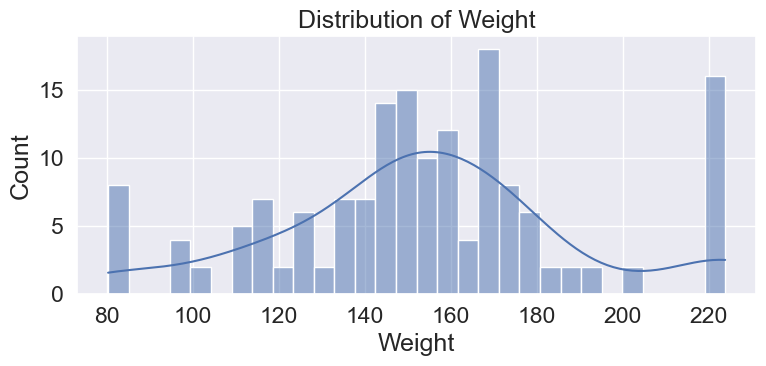

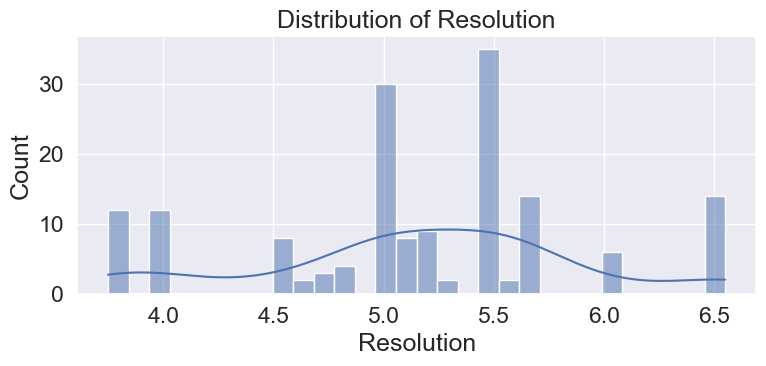

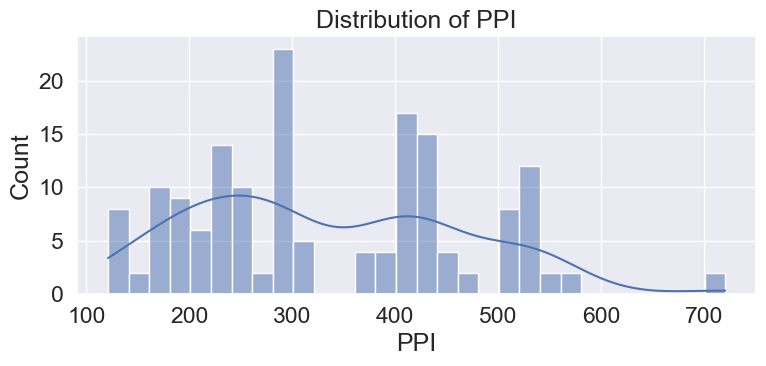

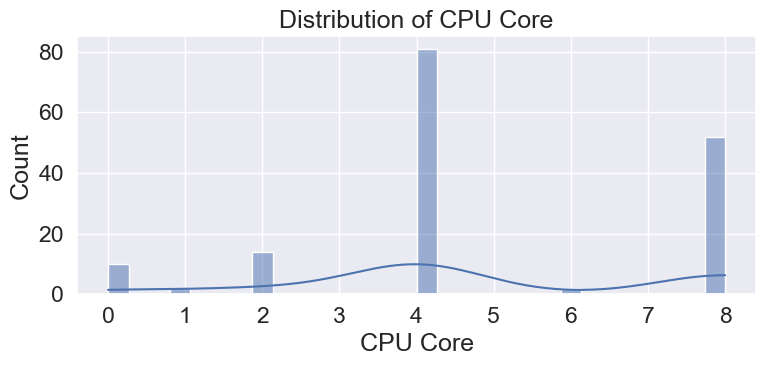

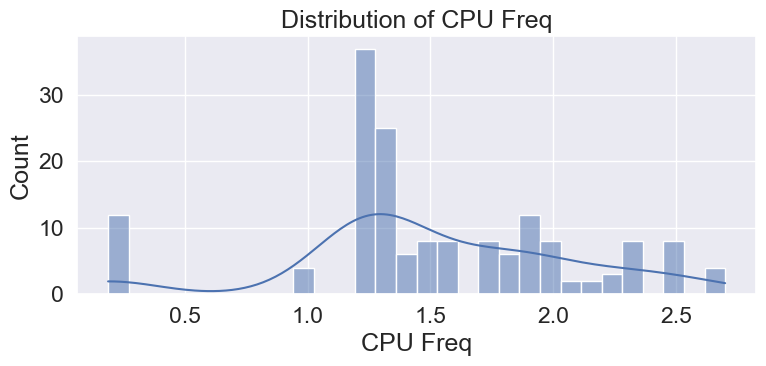

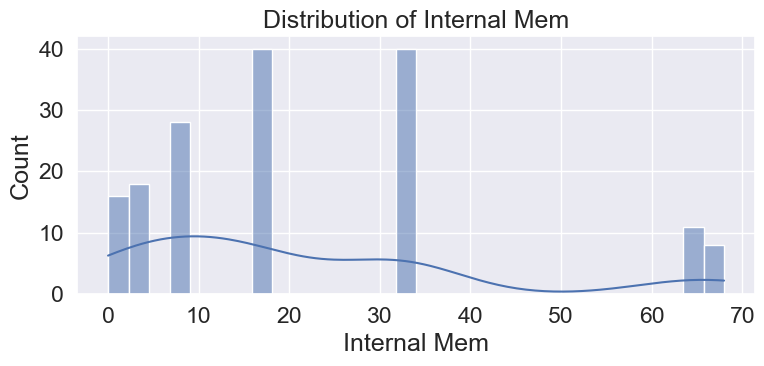

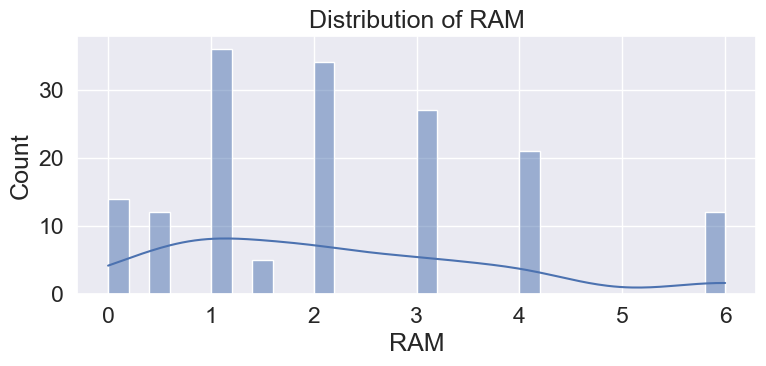

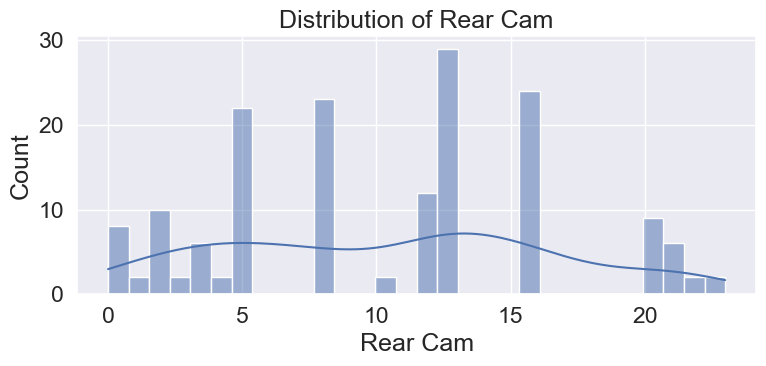

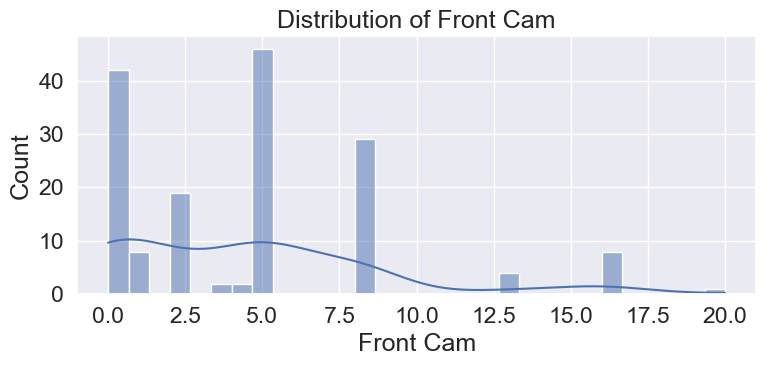

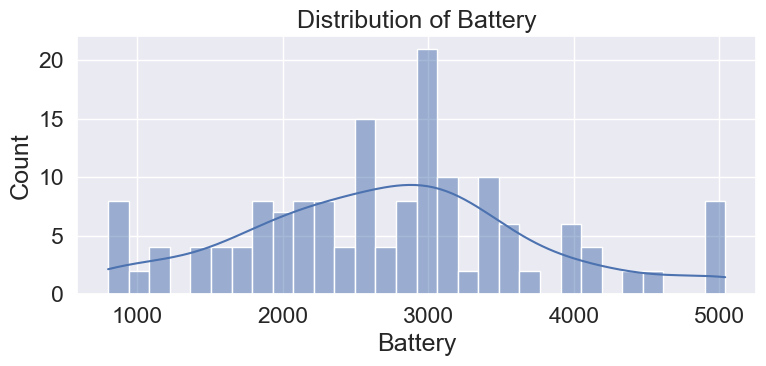

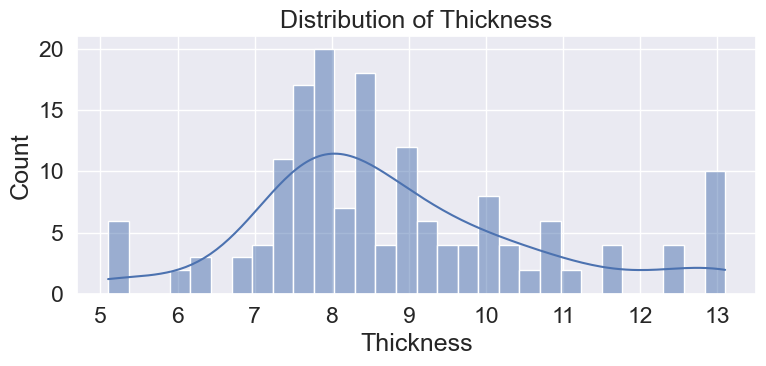

In [33]:
for feature in Numerical_col:
    plt.figure(figsize = (8,4))
    sns.histplot(Mobile_df_capped[feature], kde = True, bins = 30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [34]:
Skewness_before = Mobile_df_capped.skew()
print(Skewness_before)

Price           0.052347
Sale            1.250054
Weight          0.115564
Resolution     -0.170940
PPI             0.412330
CPU Core       -0.009077
CPU Freq       -0.275330
Internal Mem    1.164121
RAM             0.792698
Rear Cam        0.106929
Front Cam       1.169750
Battery         0.237390
Thickness       0.629078
dtype: float64


## We can clearly see that:
# Sale and Internal Mem:
### are highly skewed (so we will treat them using Logarithmic Transformation)
#  Front Cam
### is highly skewed (so we will treat it using Boxcox Transformation)
# And RAM and Thickness:
### are moderately skewed (so we will treat them using SQRT Transformation)

In [35]:
from scipy.stats import boxcox

In [36]:
# Applying logarithmetic transformation for highly skewed feature
Transformed_Mobile_df = Mobile_df_capped.copy()

Transformed_Mobile_df['Sale'] = np.log(Transformed_Mobile_df['Sale'] + 1 )

Transformed_Mobile_df['Front Cam'] = np.log(Transformed_Mobile_df['Front Cam'] + 1)

# Applying boxcox transformation for the Internal Mem

Transformed_Mobile_df['Internal Mem'], _ = boxcox(Transformed_Mobile_df['Internal Mem'] + 1)  # Adding 1 to avoid log(0)


# Applying squareroot transformation for moderately skewed feature

Transformed_Mobile_df['RAM'] = np.sqrt(Transformed_Mobile_df['RAM'])

Transformed_Mobile_df['Thickness'] = np.sqrt(Transformed_Mobile_df['Thickness'])

# Recalculate and check skewness after transformation

Skewness_after = Transformed_Mobile_df.skew()
Skewness_after

Price           0.052347
Sale            0.057420
Weight          0.115564
Resolution     -0.170940
PPI             0.412330
CPU Core       -0.009077
CPU Freq       -0.275330
Internal Mem   -0.076547
RAM            -0.276718
Rear Cam        0.106929
Front Cam      -0.316747
Battery         0.237390
Thickness       0.318092
dtype: float64

# Now checking the distribution after the transformation is done

In [37]:
Numerical_col = Transformed_Mobile_df.select_dtypes(include=['int64', 'float64']).drop(columns = ['Price']).columns

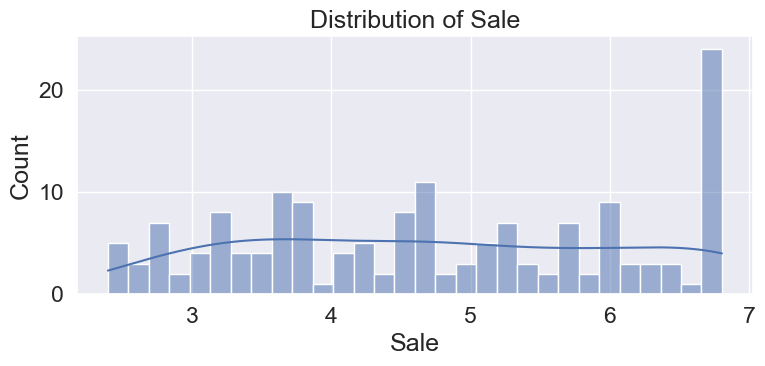

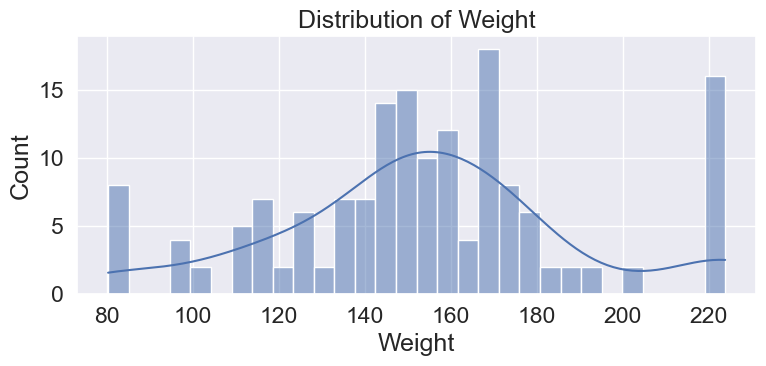

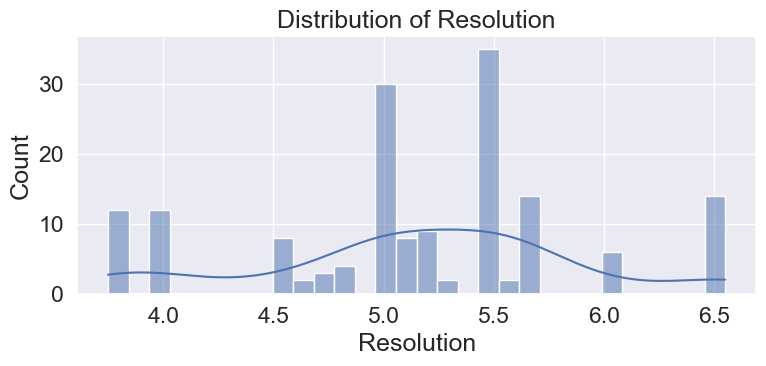

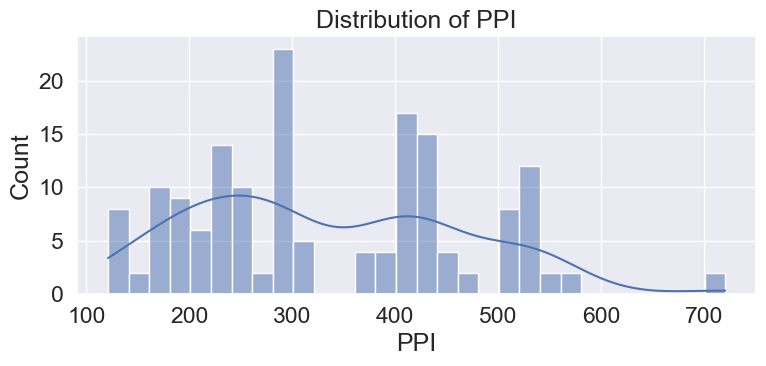

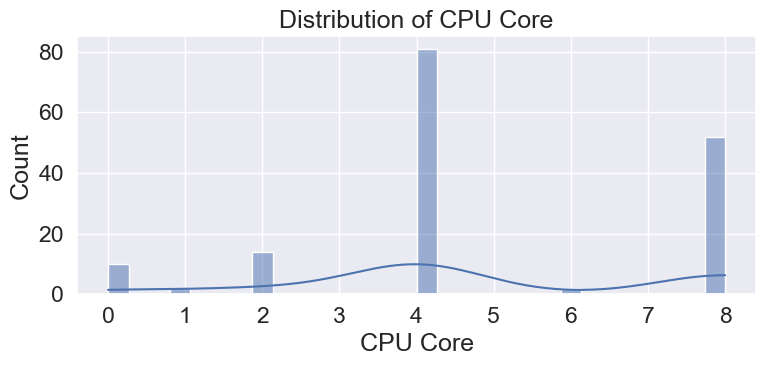

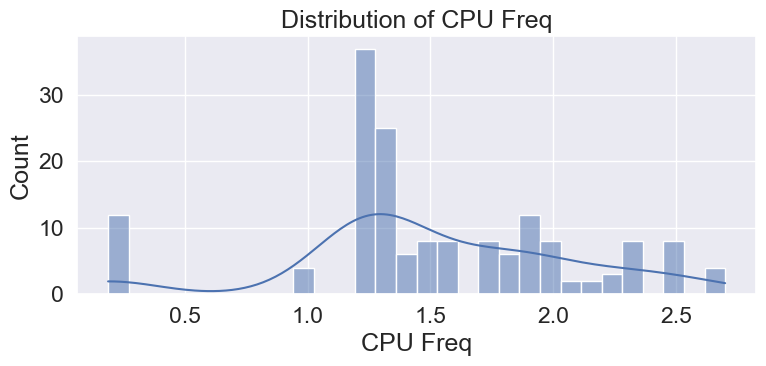

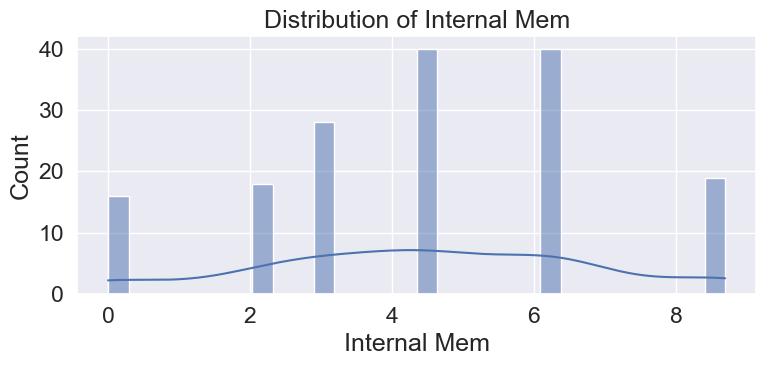

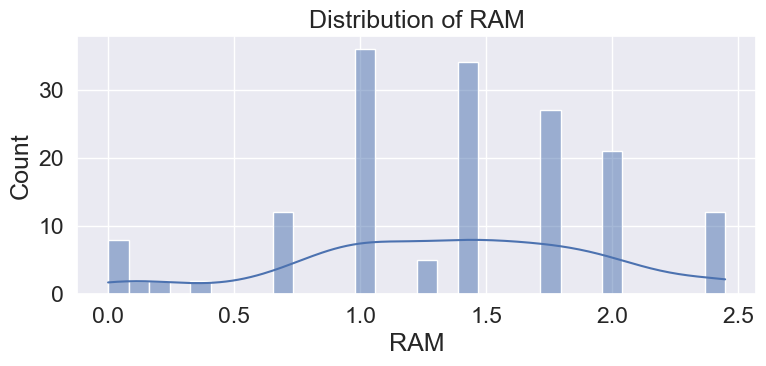

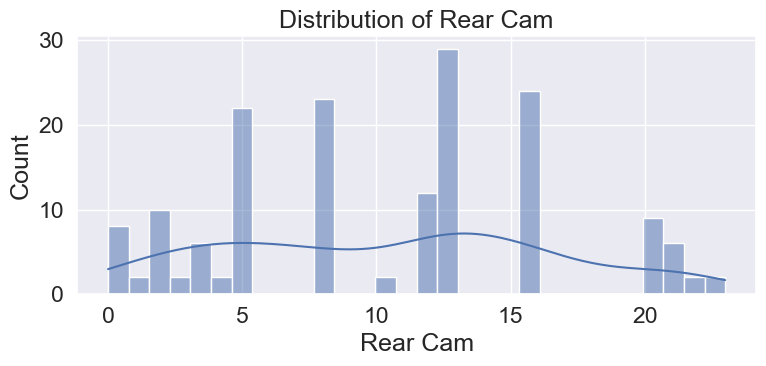

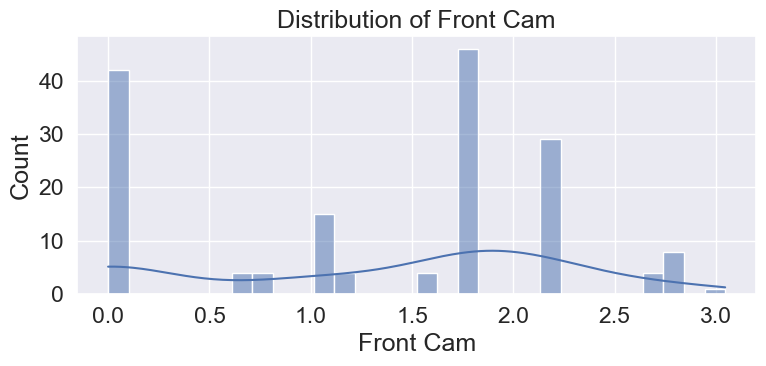

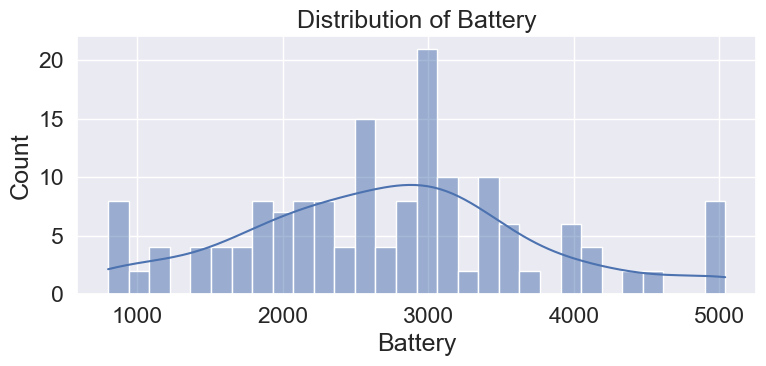

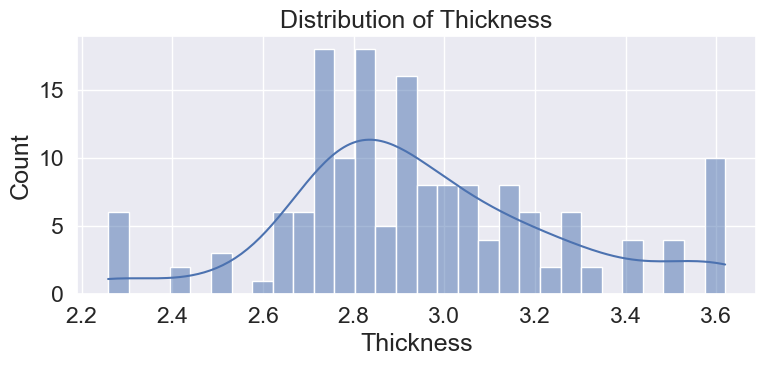

In [38]:
for feature in Numerical_col:
    plt.figure(figsize = (8,4))
    sns.histplot(Transformed_Mobile_df[feature], kde = True, bins = 30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [39]:
Transformed_Mobile_df.head(5)

,Price,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
0,2357,2.397895,135.0,5.2,424.0,8,1.35,4.517506,1.732051,13.00,2.197225,2610,2.720294
1,1749,2.397895,125.0,4.0,233.0,2,1.30,2.081855,1.000000,3.15,0.000000,1700,3.146427
2,1916,2.397895,110.0,4.7,312.0,4,1.20,3.138048,1.224745,13.00,1.791759,2000,2.756810
3,1315,2.484907,118.5,4.0,233.0,2,1.30,2.081855,0.715542,3.15,0.000000,1400,3.316625
4,1749,2.484907,125.0,4.0,233.0,2,1.30,2.081855,1.000000,3.15,0.000000,1700,3.146427


## So, clearly we can see that there are some variables which has bigger magnitude so we will treat them using standard scaler.

In [40]:
Final_df = Transformed_Mobile_df.drop(columns = ['Price'])
Final_df.head(5)

,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
0,2.397895,135.0,5.2,424.0,8,1.35,4.517506,1.732051,13.00,2.197225,2610,2.720294
1,2.397895,125.0,4.0,233.0,2,1.30,2.081855,1.000000,3.15,0.000000,1700,3.146427
2,2.397895,110.0,4.7,312.0,4,1.20,3.138048,1.224745,13.00,1.791759,2000,2.756810
3,2.484907,118.5,4.0,233.0,2,1.30,2.081855,0.715542,3.15,0.000000,1400,3.316625
4,2.484907,125.0,4.0,233.0,2,1.30,2.081855,1.000000,3.15,0.000000,1700,3.146427


In [41]:
scaler = StandardScaler()

# Columns to scale
columns_to_scale = ['Weight','PPI','Battery','Rear Cam','Resolution','CPU Core']

# Fit and transform
Final_df[columns_to_scale] = scaler.fit_transform(Final_df[columns_to_scale])

# Preview the scaled data
Final_df.head(10)


,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
0,2.397895,-0.551575,0.055352,0.687198,1.289952,1.35,4.517506,1.732051,0.425444,2.197225,-0.122938,2.720294
1,2.397895,-0.838872,-1.589876,-0.771088,-1.172684,1.30,2.081855,1.000000,-1.172970,0.000000,-1.032161,3.146427
2,2.397895,-1.269818,-0.630160,-0.167923,-0.351805,1.20,3.138048,1.224745,0.425444,1.791759,-0.732417,2.756810
3,2.484907,-1.025616,-1.589876,-0.771088,-1.172684,1.30,2.081855,0.715542,-1.172970,0.000000,-1.331904,3.316625
4,2.484907,-0.838872,-1.589876,-0.771088,-1.172684,1.30,2.081855,1.000000,-1.172970,0.000000,-1.032161,3.146427
5,2.564949,-0.120629,0.466659,0.511593,-0.351805,2.30,4.517506,1.414214,0.912271,2.197225,-0.232844,3.082207
6,2.639057,-0.577432,-1.589876,-0.771088,-1.172684,1.20,3.138048,1.000000,-1.359587,0.000000,-1.172041,3.420526
7,2.639057,-0.120629,0.466659,0.511593,-0.351805,2.30,4.517506,1.414214,0.912271,2.197225,-0.232844,3.082207
8,2.708050,-1.025616,-1.589876,-0.771088,-1.172684,1.30,2.081855,0.715542,-1.172970,0.000000,-1.331904,3.316625
9,2.772589,-0.264278,-0.081750,0.748278,-0.351805,2.50,4.517506,1.414214,0.912271,1.098612,0.066899,2.846050


## Adding the Price column back to the final Data Frame after the standard scaling

In [42]:
# Add the Price column back to Final_df
Final_df['Price'] = Transformed_Mobile_df['Price']

# Preview the updated dataframe
Final_df.head(10)

,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness,Price
0,2.397895,-0.551575,0.055352,0.687198,1.289952,1.35,4.517506,1.732051,0.425444,2.197225,-0.122938,2.720294,2357
1,2.397895,-0.838872,-1.589876,-0.771088,-1.172684,1.30,2.081855,1.000000,-1.172970,0.000000,-1.032161,3.146427,1749
2,2.397895,-1.269818,-0.630160,-0.167923,-0.351805,1.20,3.138048,1.224745,0.425444,1.791759,-0.732417,2.756810,1916
3,2.484907,-1.025616,-1.589876,-0.771088,-1.172684,1.30,2.081855,0.715542,-1.172970,0.000000,-1.331904,3.316625,1315
4,2.484907,-0.838872,-1.589876,-0.771088,-1.172684,1.30,2.081855,1.000000,-1.172970,0.000000,-1.032161,3.146427,1749
5,2.564949,-0.120629,0.466659,0.511593,-0.351805,2.30,4.517506,1.414214,0.912271,2.197225,-0.232844,3.082207,2137
6,2.639057,-0.577432,-1.589876,-0.771088,-1.172684,1.20,3.138048,1.000000,-1.359587,0.000000,-1.172041,3.420526,1238
7,2.639057,-0.120629,0.466659,0.511593,-0.351805,2.30,4.517506,1.414214,0.912271,2.197225,-0.232844,3.082207,2137
8,2.708050,-1.025616,-1.589876,-0.771088,-1.172684,1.30,2.081855,0.715542,-1.172970,0.000000,-1.331904,3.316625,1315
9,2.772589,-0.264278,-0.081750,0.748278,-0.351805,2.50,4.517506,1.414214,0.912271,1.098612,0.066899,2.846050,2580


# Now diving the data into training and testing

In [43]:
x = Final_df.drop('Price', axis = 1)
y = Final_df['Price']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

In [45]:
#print shape to confirm
print(f"x_train shape : {x_train.shape}")
print(f"x_test shape : {x_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

x_train shape : (128, 12)
x_test shape : (33, 12)
y_train shape : (128,)
y_test shape : (33,)


In [46]:
# Store the performance merics in the list

training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [47]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """

    # Fit the model
    model.fit(x_train, y_train)

    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R2 score
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100

    # Calculate the Adjusted R2 scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1-(1- train_r2/100) * (n_train - 1)/(n_train - p_train - 1))
    test_adj_r2 = 100 * (1-(1- test_r2/100) *  (n_test -1)/(n_train - p_train - 1))

    # Calculate RMSE score
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2)
    testing_scores_rmse.append(test_rmse)

    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data R2 = {train_r2: .2f}%, Adjusted_r2 = {train_adj_r2:.2f}%, RMSE = {train_rmse: 4f}")
    print(f"Testing Data R2 = {test_r2:2f}%, Adjusted_r2 = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")   

# Linear Regression

## Simple Linear Regression

In [48]:
evaluate_model_performance(
    model = LinearRegression(),
    x_train = x_train,
    y_train = y_train,
    x_test = x_test,
    y_test = y_test
)

LinearRegression Performance Metrics:
Training Data R2 =  92.94%, Adjusted_r2 = 92.20%, RMSE =  205.231574
Testing Data R2 = 92.866024%, Adjusted_r2 = 98.01%, RMSE = 193.0541



## Ridge Regression

In [49]:
evaluate_model_performance(
    model=Ridge(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data R2 =  92.94%, Adjusted_r2 = 92.20%, RMSE =  205.235150
Testing Data R2 = 92.858154%, Adjusted_r2 = 98.01%, RMSE = 193.1606



## Lasso Regression

In [50]:
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data R2 =  92.94%, Adjusted_r2 = 92.20%, RMSE =  205.235150
Testing Data R2 = 92.858154%, Adjusted_r2 = 98.01%, RMSE = 193.1606



## Elastic Net

In [51]:
evaluate_model_performance(
    model=ElasticNet(alpha=0.1, l1_ratio=0.5),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data R2 =  92.02%, Adjusted_r2 = 91.18%, RMSE =  218.158713
Testing Data R2 = 90.998528%, Adjusted_r2 = 97.50%, RMSE = 216.8553



# DecisionTree Regression

In [52]:
evaluate_model_performance(
    model=DecisionTreeRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data R2 =  100.00%, Adjusted_r2 = 100.00%, RMSE =  0.000000
Testing Data R2 = 98.981411%, Adjusted_r2 = 99.72%, RMSE = 72.9479



# Random Forest

In [53]:
evaluate_model_performance(
    model=RandomForestRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data R2 =  99.27%, Adjusted_r2 = 99.20%, RMSE =  65.769609
Testing Data R2 = 95.977587%, Adjusted_r2 = 98.88%, RMSE = 144.9628



# SVR(Support vector Regressor)

In [54]:
from sklearn.svm import SVR

In [55]:
evaluate_model_performance(
    model=SVR(kernel='rbf'),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

SVR Performance Metrics:
Training Data R2 =  3.92%, Adjusted_r2 = -6.11%, RMSE =  756.895005
Testing Data R2 = -4.076528%, Adjusted_r2 = 71.04%, RMSE = 737.3771



# KNN (Kth Nearest Neighbour)

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
evaluate_model_performance(
    model=KNeighborsRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data R2 =  92.55%, Adjusted_r2 = 91.77%, RMSE =  210.804032
Testing Data R2 = 86.843570%, Adjusted_r2 = 96.34%, RMSE = 262.1696



# Ensemble Learning Methods

## Voting Regressor

In [58]:
# Define the base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators = 100, random_state = 15)
model3 = KNeighborsRegressor()

In [59]:
# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators = [('lr', model1), ('rf', model2), ('knn', model3)])

In [60]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data R2 =  96.73%, Adjusted_r2 = 96.39%, RMSE =  139.529685
Testing Data R2 = 93.713027%, Adjusted_r2 = 98.25%, RMSE = 181.2317



## Bagging Regressor

In [61]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [62]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(random_state=15)

In [63]:
# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  # Updated parameter name
    n_estimators=50,          # Number of base estimators
    max_samples=0.8,          # Fraction of samples to use for each base estimator
    max_features=0.8,         # Fraction of features to use for each base estimator
    random_state=15,
    n_jobs=-1                 # Use all available cores
)

In [64]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data R2 =  98.81%, Adjusted_r2 = 98.69%, RMSE =  84.074278
Testing Data R2 = 94.659522%, Adjusted_r2 = 98.51%, RMSE = 167.0334



# Ada Boosting

In [65]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data R2 =  96.58%, Adjusted_r2 = 96.22%, RMSE =  142.867177
Testing Data R2 = 94.793433%, Adjusted_r2 = 98.55%, RMSE = 164.9259



# GradientBoosting Regression

In [66]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data R2 =  99.88%, Adjusted_r2 = 99.87%, RMSE =  26.981850
Testing Data R2 = 99.093706%, Adjusted_r2 = 99.75%, RMSE = 68.8094



# XGB Regression

In [67]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data R2 =  100.00%, Adjusted_r2 = 100.00%, RMSE =  0.002835
Testing Data R2 = 98.474979%, Adjusted_r2 = 99.58%, RMSE = 89.2588



# CatBoost Regression

In [68]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data R2 =  99.99%, Adjusted_r2 = 99.99%, RMSE =  5.867708
Testing Data R2 = 98.682376%, Adjusted_r2 = 99.63%, RMSE = 82.9677



In [69]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "SVR",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Ada Boost",
    "Gradient Boost",
    "XGBoost",
    "CatBoost",
    ]

In [70]:
# Ensure all metric lists match the length of the models list
models = models[:14]  # or len(training_scores_r2) if you want to match the metrics

training_scores_r2 = training_scores_r2[:len(models)]
training_scores_adj_r2 = training_scores_adj_r2[:len(models)]
training_scores_rmse = training_scores_rmse[:len(models)]
testing_scores_r2 = testing_scores_r2[:len(models)]
testing_scores_adj_r2 = testing_scores_adj_r2[:len(models)]
testing_scores_rmse = testing_scores_rmse[:len(models)]

# Now create the DataFrame
df_model = pd.DataFrame({
    "Algorithms": models,
    "Training Score R2": training_scores_r2,
    "Training Score Adjusted R2": training_scores_adj_r2,
    "Training Score RMSE": training_scores_rmse,
    "Testing Score R2": testing_scores_r2,
    "Testing Score Adjusted R2": testing_scores_adj_r2,
    "Testing Score RMSE": testing_scores_rmse,
})

# Sort by Testing Score R2
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort


,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
11,Gradient Boost,99.877898,99.865156,26.981850,99.093706,99.747814,68.809404
4,Decision Tree,100.000000,100.000000,0.000000,98.981411,99.716567,72.947885
13,CatBoost,99.994225,99.993623,5.867708,98.682376,99.633357,82.967687
12,XGBoost,100.000000,100.000000,0.002835,98.474979,99.575646,89.258801
5,Random Forest,99.274510,99.198806,65.769609,95.977587,98.880720,144.962815
10,Ada Boost,96.576692,96.219477,142.867177,94.793433,98.551216,164.925949
9,Bagging Regressor,98.814484,98.690778,84.074278,94.659522,98.513954,167.033414
8,Voting Regressor,96.734766,96.394046,139.529685,93.713027,98.250581,181.231662
0,Linear Regression,92.935696,92.198551,205.231574,92.866024,98.014894,193.054127
1,Ridge,92.935450,92.198279,205.235150,92.858154,98.012704,193.160593


# Checking for the best model

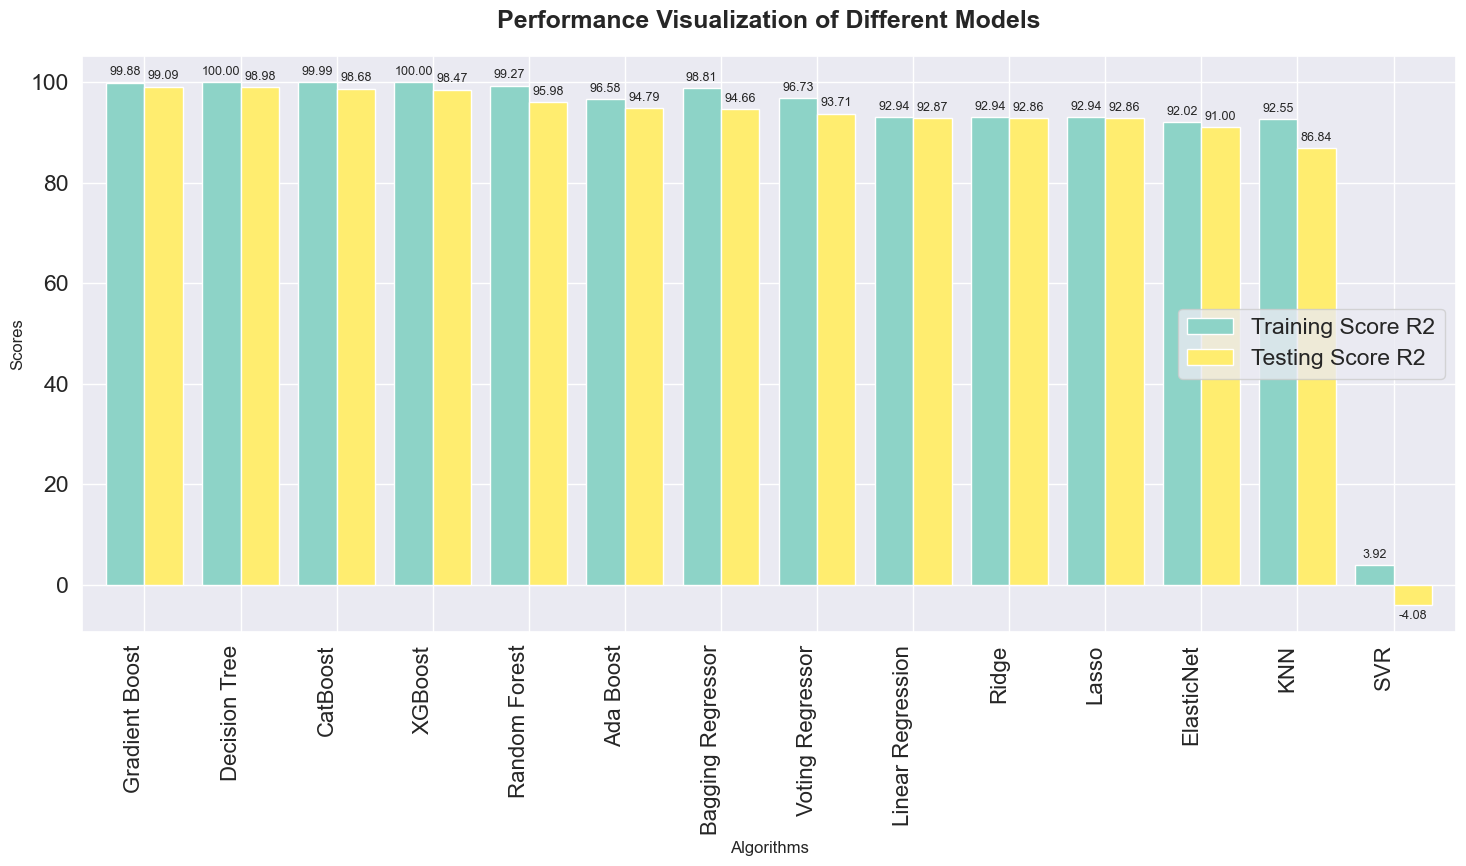

In [71]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

# Checking the RMSE Values for each of the models

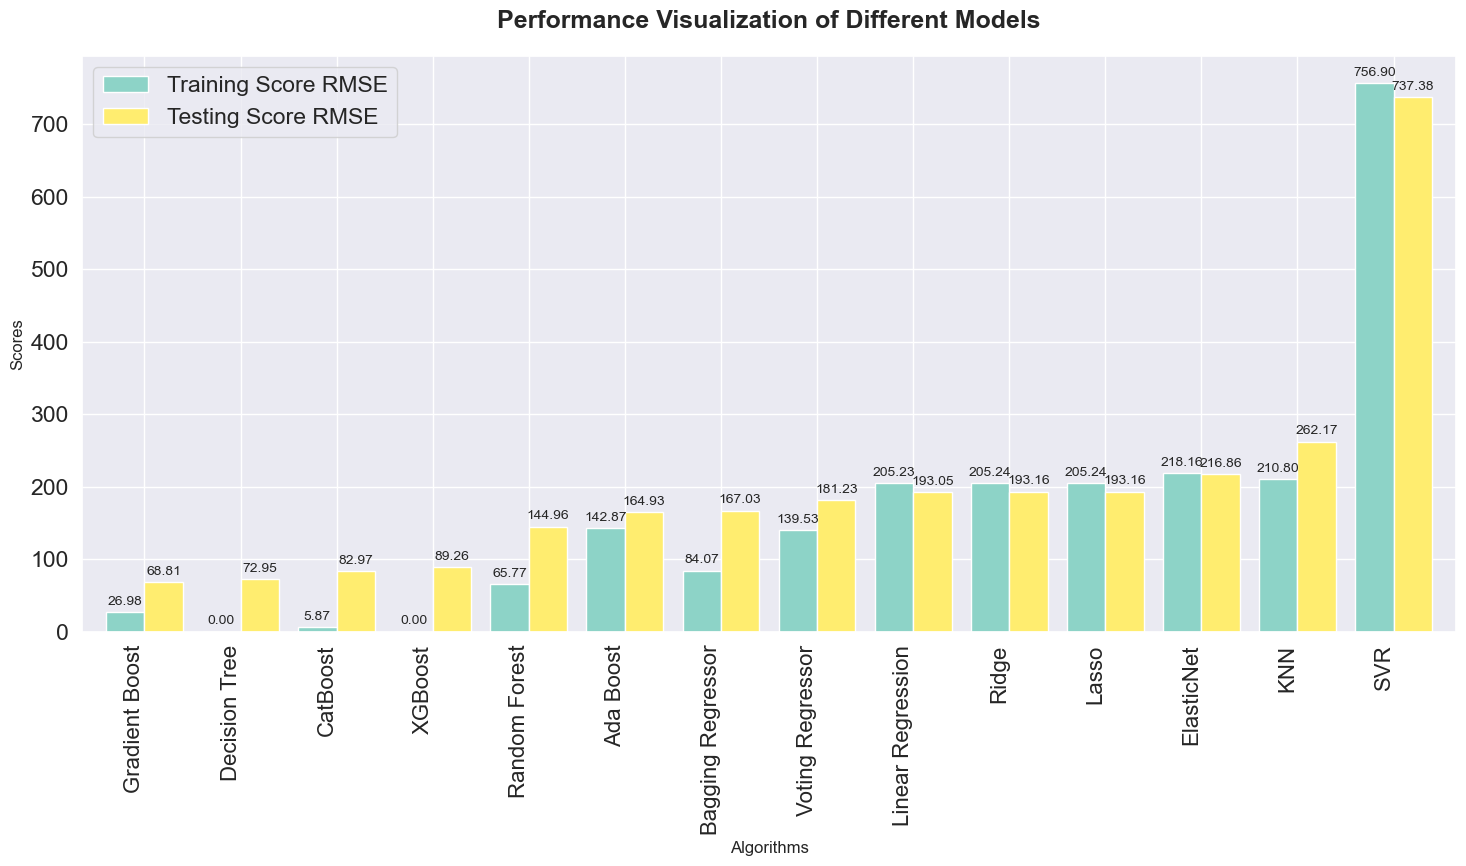

In [72]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

# From the above graphs we can infer that Gradient Boost is performing better, and we will send it for further analysis.